EDA DATASETS OBLIGATORIOS

In [508]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sodapy import Socrata
import warnings
warnings.simplefilter('ignore')

Taxi Zone & Lookup

El dataset "Taxi Zone and Lookup" contiene información detallada sobre las zonas de taxi en los cinco boroughs de la ciudad de Nueva York. Cada zona de taxi está clasificada según el tipo de taxi que se puede tomar en ella, incluyendo taxis amarillos, verdes y vehículos de transporte con conductor (FHV).

In [509]:
#Cargar los datos
Taxi_zone_df=pd.read_csv('Datasets/taxi+_zone_lookup.csv',sep=',')

In [510]:
#Se imprimen las primeras 5 filas del dataset
Taxi_zone_df.head(5)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [511]:
#Se imprimen las columnas del dataset
Taxi_zone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [512]:
#Revisar los valores nulos
valores_faltantes = Taxi_zone_df.isna().sum()
print(valores_faltantes)

LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64


Vemos que la cantidad de valores nulos es baja (menos del 5%). En este caso es aconsejable directamente eliminar los datos porque no representa una pérdida grande de información.

In [513]:
#Revisar los valores duplicados
duplicados = Taxi_zone_df[Taxi_zone_df.duplicated(keep=False)]

#Se imprimen las filas duplicadas.
print(duplicados)

Empty DataFrame
Columns: [LocationID, Borough, Zone, service_zone]
Index: []


Vemos que no hay valores duplicados.

7
Borough
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
Unknown           2
EWR               1
Name: count, dtype: int64


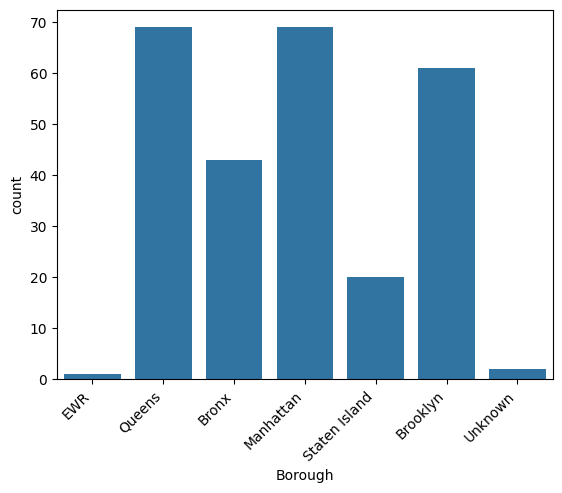

In [514]:
#Variables categoricas
#Borough
print(len(Taxi_zone_df['Borough'].unique()))
print(Taxi_zone_df['Borough'].value_counts())
ax = sns.countplot(x="Borough", data=Taxi_zone_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

El gráfico de barras que analizamos muestra la distribución de zonas de taxi por condado en la ciudad de Nueva York. Vemos claramente que Manhattan tiene la mayor cantidad de zonas de taxi, seguido por Brooklyn y Queens. Por otro lado, Staten Island tiene la menor cantidad. Esto podría estar relacionado con la densidad de población, ya que Manhattan es el condado más densamente poblado y tendría una mayor demanda de taxis.

262
Zone
Governor's Island/Ellis Island/Liberty Island    3
Corona                                           2
Newark Airport                                   1
Ocean Hill                                       1
Parkchester                                      1
Name: count, dtype: int64


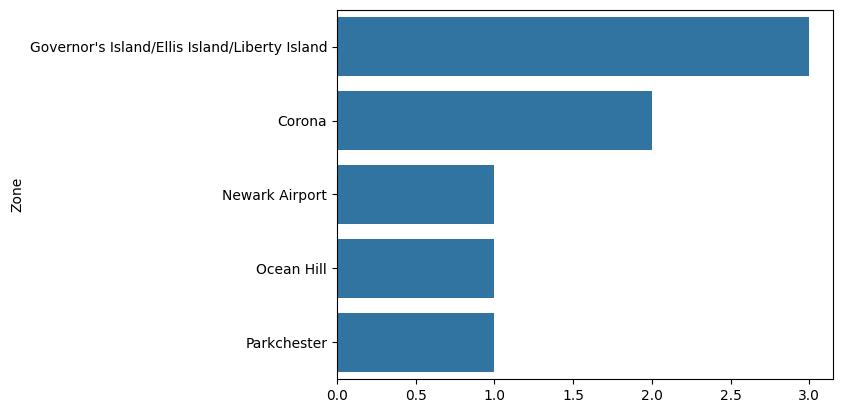

In [515]:
#Zone
print(len(Taxi_zone_df['Zone'].unique()))

top_5 = Taxi_zone_df['Zone'].value_counts().head(5)
print(top_5)
# Se crea un gráfico de barras
ax = sns.barplot(x=top_5.values, y=top_5.index, orient='y')

# Se imprime la gráfica
plt.show()

El gráfico de barras ilustra la distribución de zonas de taxis en la ciudad de Nueva York. La zona con mayor cantidad de zonas de taxis es Governor's Island/Ellis Island/Liberty Island, con 3 zonas, mientras que Ocean Hill y Parkchester tienen la menor cantidad, con solo 1 zona cada una. Cabe destacar que dos zonas, Corona y Newark Airport, comparten la misma cantidad de zonas de taxis, con 2 cada una.

5
service_zone
Boro Zone      205
Yellow Zone     55
Airports         2
EWR              1
Name: count, dtype: int64


<Axes: xlabel='service_zone', ylabel='count'>

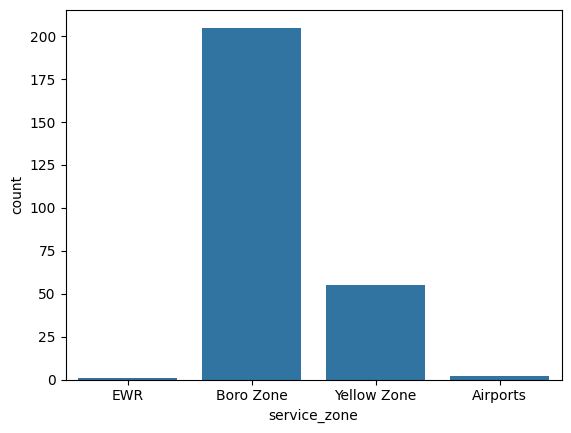

In [516]:
#Service zone
print(len(Taxi_zone_df['service_zone'].unique()))
print(Taxi_zone_df['service_zone'].value_counts())
sns.countplot(data=Taxi_zone_df,x='service_zone')

El gráfico de barras muestra la distribución de las zonas de taxis en la ciudad de Nueva York según su tipo. La categoría más común es la Zona Boro, con 205 zonas, seguida de la Zona Amarilla con 55 zonas. Las zonas de aeropuertos son menos frecuentes, con solo 2 zonas, y el Aeropuerto Internacional Liberty Newark (EWR) se representa como una zona única. La prevalencia de las Zonas Boro refleja la amplia cobertura del servicio de taxis en los distritos de la ciudad, concentrándose en áreas con alta densidad de población y actividad comercial. Las Zonas Amarillas, por otro lado, se ubican en áreas de mayor demanda, como atracciones turísticas, centros de transporte y zonas de vida nocturna.

Electric car data normalized

El dataset "Electric car data normalized" contiene información sobre diversos modelos de autos eléctricos. Incluye detalles como marca, modelo, aceleración, velocidad máxima, autonomía, eficiencia, capacidades de carga, tipo de tren motriz, tipo de enchufe, estilo de carrocería, número de asientos y precio en euros. Este conjunto de datos parece útil para comparar las especificaciones de diferentes modelos de autos eléctricos.

In [517]:
#Cargar datos
electric_car_df=pd.read_csv('Datasets/ElectricCarData_Clean.csv',sep=',')

In [518]:
#Se imprimen las primeras 5 filas del dataset
electric_car_df.head(5)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [519]:
#Se imprimen las columnas del dataset
electric_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [520]:
#Revisar los valores nulos
valores_faltantes = electric_car_df.isna().sum()
print(valores_faltantes)

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


Vemos que el dataset no tiene valores nulos en ninguna columna.

In [521]:
#Revisar los valores duplicados
duplicados = electric_car_df[electric_car_df.duplicated(keep=False)]

#Se imprimen las filas duplicadas.
print(duplicados)

Empty DataFrame
Columns: [Brand, Model, AccelSec, TopSpeed_KmH, Range_Km, Efficiency_WhKm, FastCharge_KmH, RapidCharge, PowerTrain, PlugType, BodyStyle, Segment, Seats, PriceEuro]
Index: []


Vemos que el dataset no tiene columnas duplicadas.

In [522]:
#Revisar el tipo de dato
electric_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


Vemos que todas las columnas menos FastCharge_KmH corresponden con el tipo de dato.

33
Brand
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: count, dtype: int64


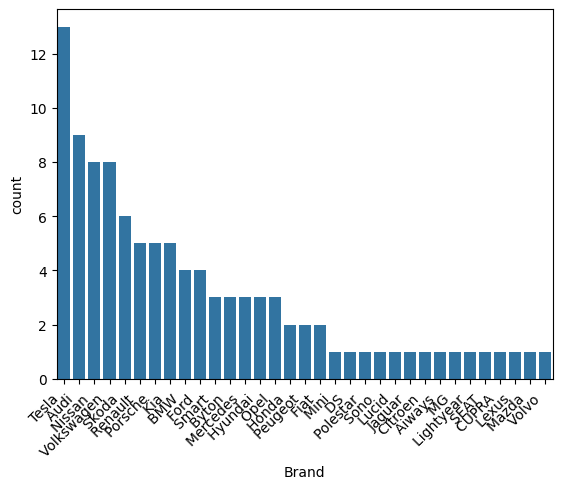

In [523]:
#Variables categoricas
print(len(electric_car_df['Brand'].unique()))
print(electric_car_df['Brand'].value_counts())
brand_counts = electric_car_df['Brand'].value_counts()
brand_counts_sorted = brand_counts.sort_values(ascending=False)
ax = sns.countplot(x="Brand", data=electric_car_df, order=brand_counts_sorted.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

El gráfico de barras muestra la distribución de la cantidad de carros por marca. La marca más popular es Tesla, con 13 carros, seguida de Audi con 9 carros. Las marcas Nissan, Volkswagen y Skoda comparten el tercer lugar con 8 carros cada una. Algunas marcas tienen una presencia menor en el dataset, con solo 1 carro cada una. La variedad de modelos de Tesla se explica porque esta marca solamente ofrece autos eléctricos, mientras que las marcas más tradicionales hasta ahora están empezando a incursionar en ese mercado, ofreciendo menos modelos.

2
RapidCharge
Yes    98
No      5
Name: count, dtype: int64


<Axes: xlabel='RapidCharge', ylabel='count'>

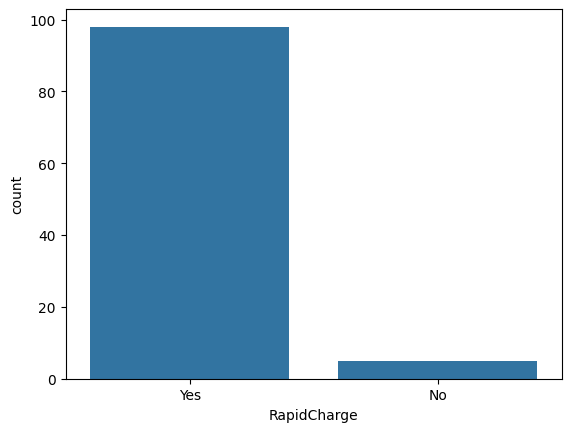

In [524]:
print(len(electric_car_df['RapidCharge'].unique()))
print(electric_car_df['RapidCharge'].value_counts())
sns.countplot(data=electric_car_df,x='RapidCharge')

El gráfico de barras muestra la distribución de carros según su capacidad de carga rápida. La mayoría de los carros en el dataset, 98, sí admiten carga rápida, mientras que solo 5 carros no la admiten.

3
PowerTrain
AWD    41
FWD    37
RWD    25
Name: count, dtype: int64


<Axes: xlabel='PowerTrain', ylabel='count'>

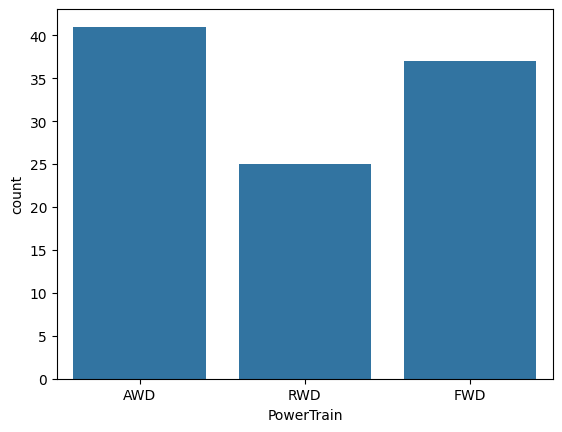

In [525]:
print(len(electric_car_df['PowerTrain'].unique()))
print(electric_car_df['PowerTrain'].value_counts())
sns.countplot(data=electric_car_df,x='PowerTrain')

El gráfico de barras muestra la distribución de los vehículos según su tipo de tren motriz: AWD (Tracción Total) con 41 vehículos, FWD (Tracción Delantera) con 37 vehículos y RWD (Tracción Trasera) con 25 vehículos. AWD es el tipo de tren motriz más popular, posiblemente debido a sus ventajas en tracción, estabilidad y manejo, especialmente en terrenos difíciles.

4
PlugType
Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: count, dtype: int64


<Axes: xlabel='PlugType', ylabel='count'>

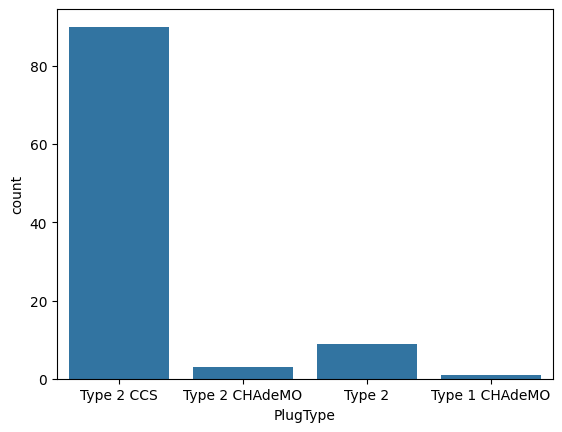

In [526]:
print(len(electric_car_df['PlugType'].unique()))
print(electric_car_df['PlugType'].value_counts())
sns.countplot(data=electric_car_df,x='PlugType')

El gráfico de barras muestra la distribución de los vehículos eléctricos según su tipo de enchufe: Type 2 CCS con 90 vehículos, Type 2 con 9 vehículos, Type 2 CHAdeMO con 3 vehículos y Type 1 CHAdeMO con 1 vehículo. Type 2 CCS es el tipo de enchufe más popular, probablemente debido a su rápida velocidad de carga, compatibilidad y creciente adopción en Europa y América del Norte.

9
BodyStyle
SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: count, dtype: int64


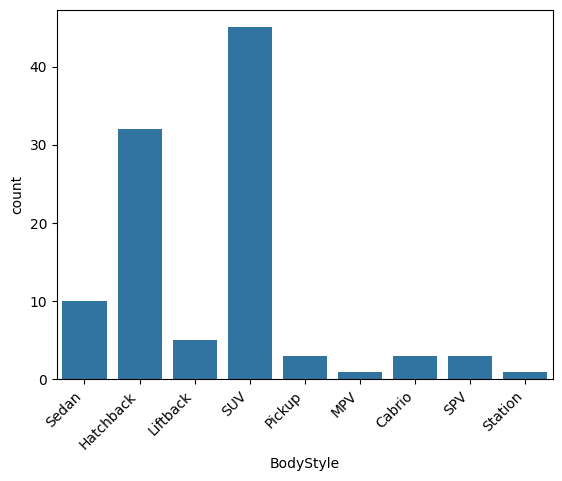

In [527]:
print(len(electric_car_df['BodyStyle'].unique()))
print(electric_car_df['BodyStyle'].value_counts())
ax = sns.countplot(x="BodyStyle", data=electric_car_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

El gráfico de barras muestra la distribución de los carros según su tipo de carro. La categoría más popular es SUV, con 45 carros, seguida de Hatchback con 32 carros. Las categorías Sedan, Liftback y Pickup comparten el tercer lugar con 10, 5 y 3 carros, respectivamente. Las categorías restantes, Cabrio, SPV, MPV y Station, tienen una presencia menor, con 3 carros cada una y 1 carro, respectivamente.Los SUV ofrecen una combinación de espacio, comodidad y capacidad todoterreno que los hace atractivos para una amplia gama de consumidores.

8
Segment
C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: count, dtype: int64


<Axes: xlabel='Segment', ylabel='count'>

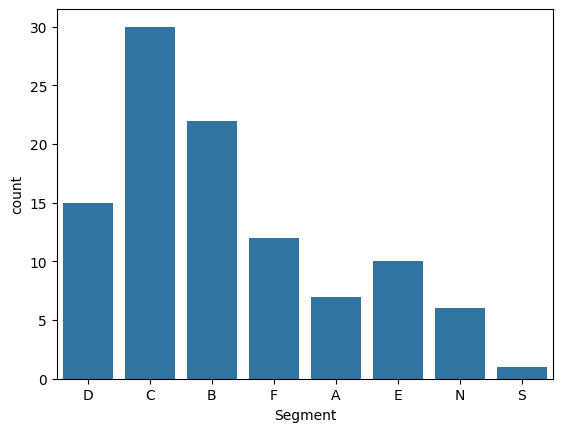

In [528]:
print(len(electric_car_df['Segment'].unique()))
print(electric_car_df['Segment'].value_counts())
sns.countplot(data=electric_car_df,x='Segment')

El gráfico de barras muestra la distribución de los carros según su segmento. El segmento más popular es C, con 30 carros, seguido del segmento B con 22 carros. Los segmentos restantes tienen una presencia menor, que va desde 15 carros para el segmento D hasta 1 carro para el segmento S.Los carros del segmento C se asocian con lujo, rendimiento y características avanzadas, lo que podría explicar su popularidad en el caso de autos electricos que son considerados como productos de este tipo (como es el caso de Tesla).

count    103.000000
mean       7.396117
std        3.017430
min        2.100000
25%        5.100000
50%        7.300000
75%        9.000000
max       22.400000
Name: AccelSec, dtype: float64


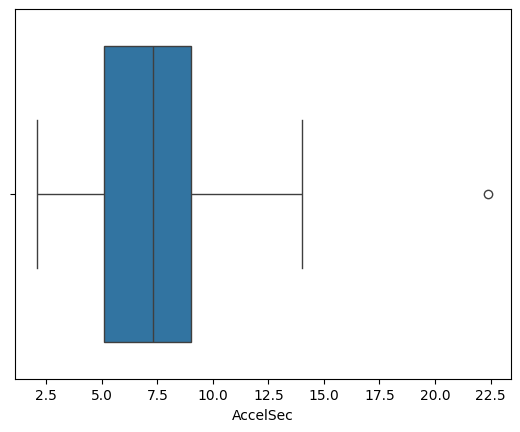

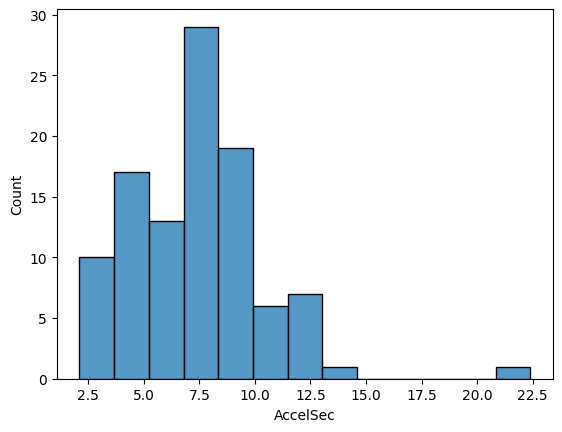

In [529]:
#Variables numericas
# Se utiliza describe para tener un resumen estadístico de los datos.
print(electric_car_df['AccelSec'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=electric_car_df, x='AccelSec')
plt.show()
#Se grafica un histograma
sns.histplot(data=electric_car_df, x='AccelSec')
plt.show()

El análisis de los datos de AccelSec, el tiempo de aceleración de 0 a 100 km/h para autos eléctricos, revela que la media es de 7.4 segundos, con una variabilidad moderada y una distribución posiblemente simétrica. La mayoría de los autos eléctricos se encuentran en el rango de 5 a 9 segundos de aceleración, pero hay una amplia gama de rendimiento entre los modelos. Solamente hay un outlier.

count    103.000000
mean     179.194175
std       43.573030
min      123.000000
25%      150.000000
50%      160.000000
75%      200.000000
max      410.000000
Name: TopSpeed_KmH, dtype: float64


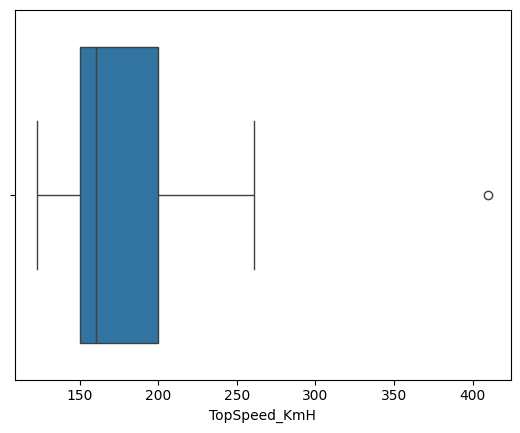

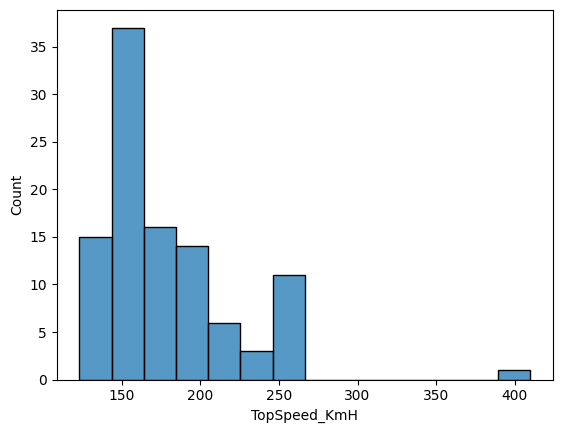

In [530]:
# Se utiliza describe para tener un resumen estadístico de los datos.
print(electric_car_df['TopSpeed_KmH'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=electric_car_df, x='TopSpeed_KmH')
plt.show()
#Se grafica un histograma
sns.histplot(data=electric_car_df, x='TopSpeed_KmH')
plt.show()


El análisis de la velocidad máxima (TopSpeed_KmH) de los autos eléctricos en el conjunto de datos revela que la velocidad promedio es de 179.20 km/h, con una variabilidad moderada y una distribución en forma de campana. La mayoría de los autos se encuentran en el rango de 150 a 200 km/h, pero hay una amplia gama de velocidades máximas entre los diferentes modelos. La distribución se ve influenciada por factores como la priorización de la eficiencia o el rendimiento por parte de los fabricantes, la tecnología de la batería, el peso y la aerodinámica del vehículo, las regulaciones locales y las condiciones de conducción reales.

count    103.000000
mean     338.786408
std      126.014444
min       95.000000
25%      250.000000
50%      340.000000
75%      400.000000
max      970.000000
Name: Range_Km, dtype: float64


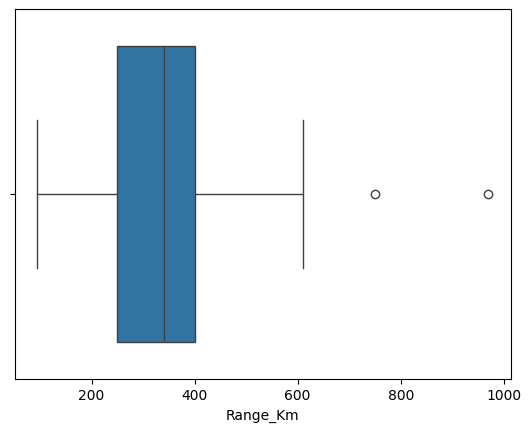

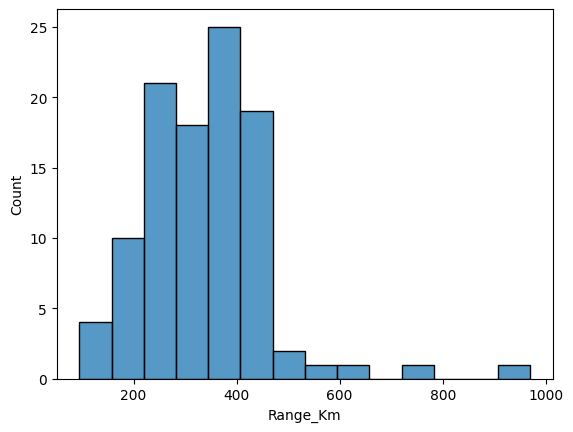

In [531]:
# Se utiliza describe para tener un resumen estadístico de los datos.
print(electric_car_df['Range_Km'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=electric_car_df, x='Range_Km')
plt.show()
#Se grafica un histograma
sns.histplot(data=electric_car_df, x='Range_Km')
plt.show()

El análisis de la autonomía (Range_Km) de los autos eléctricos en el conjunto de datos revela que la autonomía promedio es de 338.79 km, con una variabilidad considerable y una distribución en forma de campana. La mayoría de los autos se encuentran en el rango de 250 a 400 km de autonomía, pero hay una amplia gama de distancias que pueden recorrer los diferentes modelos con una sola carga. La distribución se ve influenciada por factores como la capacidad de la batería, la eficiencia energética, el diseño y peso del vehículo, las condiciones de conducción y la disponibilidad de infraestructura de carga.

count     103
unique     51
top       230
freq        6
Name: FastCharge_KmH, dtype: object


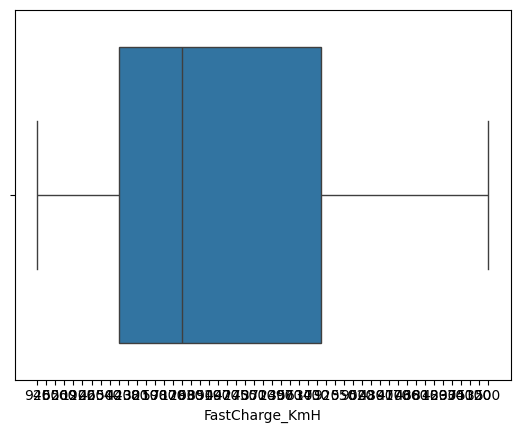

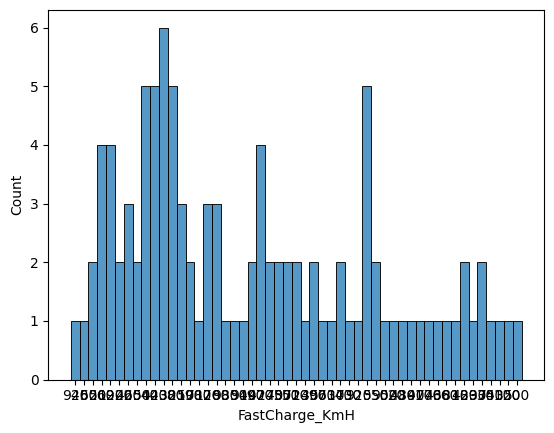

In [532]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(electric_car_df['FastCharge_KmH'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=electric_car_df, x='FastCharge_KmH')
plt.show()
#Se grafica un histograma
sns.histplot(data=electric_car_df, x='FastCharge_KmH')
plt.show()

El análisis de la velocidad de carga rápida (FastCharge_KmH) de los autos eléctricos en el conjunto de datos revela que la velocidad promedio es de 456.73 km/h, con una variabilidad considerable y una distribución en forma de campana. La mayoría de los autos se encuentran en el rango de 275 a 560 km/h de velocidad de carga rápida, pero hay una amplia gama de velocidades que pueden alcanzar los diferentes modelos con una carga rápida.

count    103.000000
mean     189.165049
std       29.566839
min      104.000000
25%      168.000000
50%      180.000000
75%      203.000000
max      273.000000
Name: Efficiency_WhKm, dtype: float64


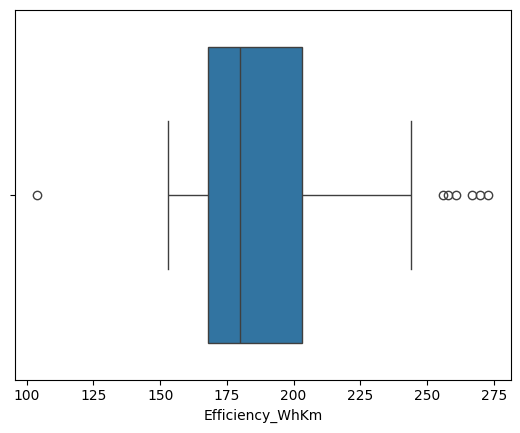

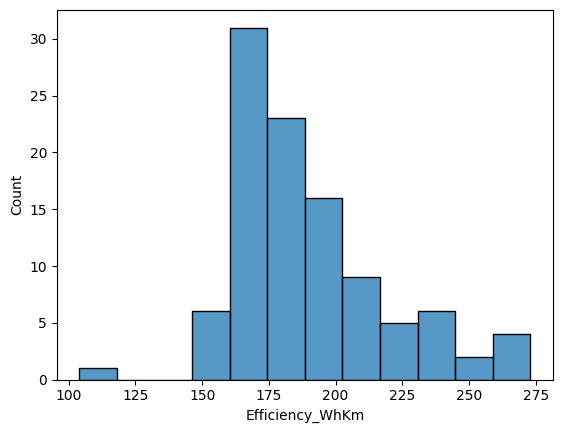

In [533]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(electric_car_df['Efficiency_WhKm'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=electric_car_df, x='Efficiency_WhKm')
plt.show()
#Se grafica un histograma
sns.histplot(data=electric_car_df, x='Efficiency_WhKm')
plt.show()

El análisis de la eficiencia energética (Efficiency_WhKm) de los autos eléctricos en el conjunto de datos revela que la eficiencia promedio es de 189.17 Wh/Km, con una variabilidad moderada y una distribución ligeramente asimétrica hacia los valores más altos. La mayoría de los autos se encuentran en el rango de 168 a 203 Wh/Km de eficiencia energética, pero hay una amplia gama de eficiencias que pueden alcanzar los diferentes modelos.

count    103.000000
mean       4.883495
std        0.795834
min        2.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        7.000000
Name: Seats, dtype: float64


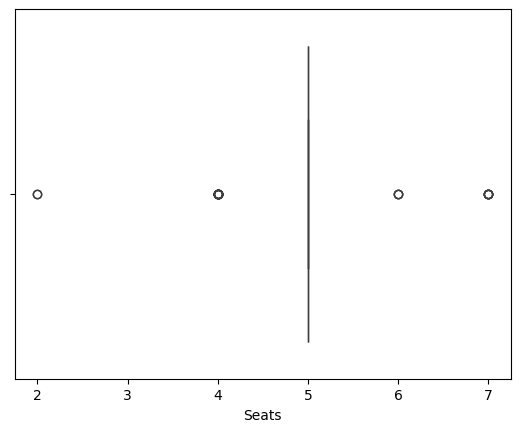

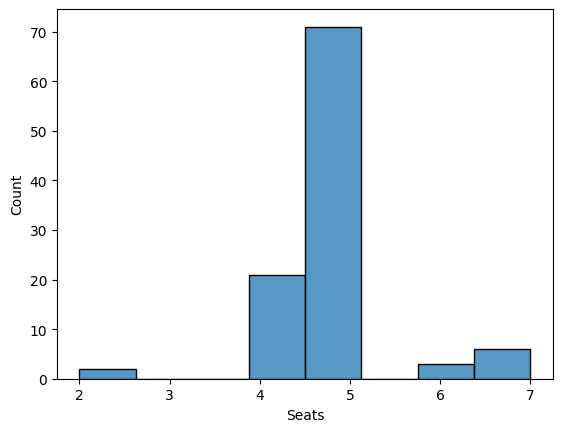

In [534]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(electric_car_df['Seats'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=electric_car_df, x='Seats')
plt.show()
#Se grafica un histograma
sns.histplot(data=electric_car_df, x='Seats')
plt.show()

El análisis del número de asientos ("Seats") en un conjunto de datos de autos eléctricos revela que la cantidad promedio de asientos es de 4.88, con una variabilidad moderada y una distribución centrada en torno al valor promedio. La mayoría de los autos tienen entre 2 y 7 asientos, con una preferencia por 5 asientos. Esta distribución puede estar influenciada por factores como el tamaño del auto, el estilo de la carrocería, y el mercado objetivo al que está dirigido.

count       103.000000
mean      55811.563107
std       34134.665280
min       20129.000000
25%       34429.500000
50%       45000.000000
75%       65000.000000
max      215000.000000
Name: PriceEuro, dtype: float64


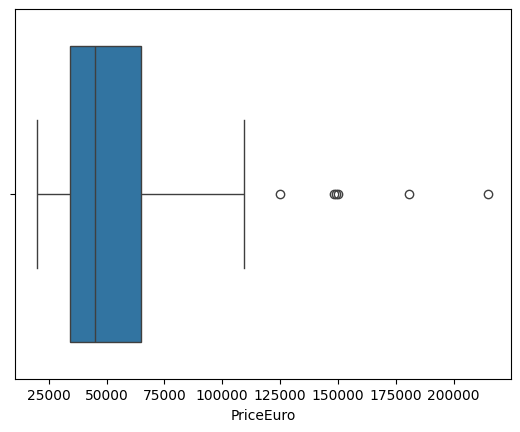

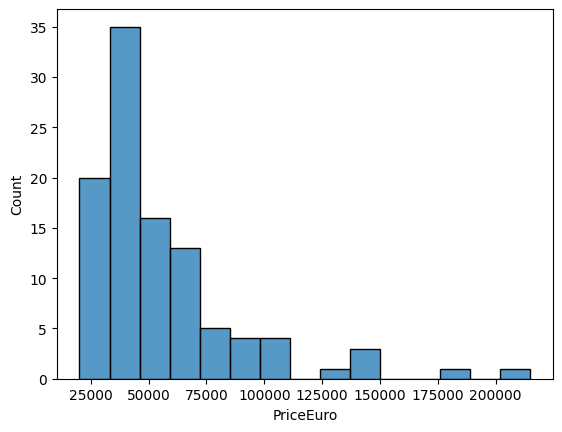

In [535]:
# Se utiliza describe para tener un resumen estadístico de los datos.
print(electric_car_df['PriceEuro'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=electric_car_df, x='PriceEuro')
plt.show()
#Se grafica un histograma
sns.histplot(data=electric_car_df, x='PriceEuro')
plt.show()

El precio de los autos eléctricos (PriceEuro) revela una distribución moderadamente variable, con un precio promedio de 55.811.56 Euros. La mayoría de los autos se encuentran en un rango de precios entre 20.129 Euros y 215.000 Euros, con una tendencia hacia precios más cercanos a la mediana de 45.000 Euros. La distribución presenta una leve asimetría positiva, indicando que hay más autos con precios más altos que con precios más bajos. Los precios se ven influenciados por factores como la tecnología de la batería, la autonomía, el rendimiento, las características tecnológicas, la reputación de la marca y la demanda del mercado.

Alternative Fuel Vehicles

Este conjunto de datos, que abarca 882 vehículos con combustibles alternativos, ofrece una amplia información sobre diversos aspectos como la categoría del vehículo, el nombre del modelo, el año del modelo, el fabricante, el tipo de combustible, la autonomía eléctrica, la autonomía híbrida, la economía de combustible (tanto alternativa como convencional) y la capacidad de pasajeros. El conjunto de datos parece estar especialmente centrado en los vehículos con combustibles alternativos, lo que permite obtener información sobre las características y tendencias de estos vehículos. Sin embargo, algunas columnas contienen valores ausentes, lo que puede requerir la limpieza de datos o la exclusión de registros incompletos antes de realizar un análisis en profundidad.

In [536]:
#Cargar datos
Alternative_fuel_vehicles_df=pd.read_csv('Datasets/Alternative Fuel Vehicles US.csv',sep=',')

In [537]:
#Se imprimen las primeras 5 filas del dataset
Alternative_fuel_vehicles_df.head(5)

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [538]:
#Se imprimen las columnas del dataset
Alternative_fuel_vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

In [539]:
#Extraemos solamente las columnas que son relevantes para el análisis que vamos a hacer.
Alternative_fuel_vehicles_df=Alternative_fuel_vehicles_df[['Category','Model','Model Year','Manufacturer','Fuel','All-Electric Range','PHEV Total Range','Alternative Fuel Economy Combined','Conventional Fuel Economy Combined','Number of Passengers']]

In [540]:
#Revisar valores nulos
valores_faltantes = Alternative_fuel_vehicles_df.isna().sum()
print(valores_faltantes)

Category                                0
Model                                   0
Model Year                            288
Manufacturer                            0
Fuel                                    0
All-Electric Range                    660
PHEV Total Range                      839
Alternative Fuel Economy Combined     620
Conventional Fuel Economy Combined    438
Number of Passengers                  761
dtype: int64


El aconteo de valores nulos en el conjunto de datos "Alternative Fuel Vehicles" revela que si bien tres columnas (Categoría, Modelo y Fabricante) no tienen datos faltantes, otras presentan porcentajes considerables de valores ausentes:Alta tasa de datos faltantes: All-Electric Range (660), PHEV Total Range (839) y Number of Passengers (761) tienen más del 70% de datos faltantes, lo que podría afectar significativamente el análisis. Tasa moderada de datos faltantes: Alternative Fuel Economy Combined (620) y Conventional Fuel Economy Combined (438) tienen alrededor del 50-70% de datos faltantes, lo que también podría requerir atención. Baja tasa de datos faltantes: Model Year, con 288 valores faltantes (aproximadamente el 33%), tiene una tasa relativamente baja, pero aún podría requerir consideración.

In [541]:
#Revisar valores duplicados
duplicados = Alternative_fuel_vehicles_df[Alternative_fuel_vehicles_df.duplicated(keep=False)]

#Se imprimen las filas duplicadas.
print(duplicados)

        Category           Model  Model Year   Manufacturer             Fuel  \
230          SUV  GLE 450 4MATIC      2022.0  Mercedes-Benz  Hybrid Electric   
231          SUV  GLE 450 4MATIC      2022.0  Mercedes-Benz  Hybrid Electric   
505  Sedan/Wagon    E 450 4MATIC      2021.0  Mercedes-Benz  Hybrid Electric   
506  Sedan/Wagon    E 450 4MATIC      2021.0  Mercedes-Benz  Hybrid Electric   

     All-Electric Range  PHEV Total Range  Alternative Fuel Economy Combined  \
230                 NaN               NaN                                NaN   
231                 NaN               NaN                                NaN   
505                 NaN               NaN                                NaN   
506                 NaN               NaN                                NaN   

     Conventional Fuel Economy Combined Number of Passengers  
230                                22.0                  NaN  
231                                22.0                  NaN  
505      

Vemos que hay algunas columnas duplicadas, pero son pocas.

In [542]:
#Revisar tipo de dato
Alternative_fuel_vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy Combined   262 non-null    float64
 8   Conventional Fuel Economy Combined  444 non-null    float64
 9   Number of Passengers                121 non-null    object 
dtypes: float64(5), object(5)
memory usage: 69.0+ KB


Vemos que las columnas corresponden con el tipo de dato esperado.

15
Category
Sedan/Wagon                      283
SUV                              222
Pickup                            79
Transit Bus                       77
Vocational/Cab Chassis            68
Passenger Van/Shuttle Bus         46
Van                               23
Street Sweeper                    21
School Bus                        21
Refuse                            16
Tractor                           15
Step Van                           5
TractorVocational/Cab Chassis      4
Vocational/Cab ChassisVan          1
Vocational/Cab ChassisTractor      1
Name: count, dtype: int64


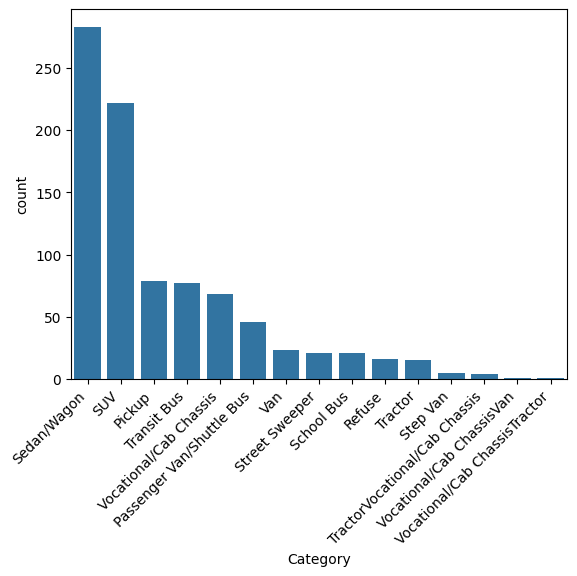

In [543]:
#Variables categoricas

# Se cuanta el numero de categorias y cuantas entradas hay en cada una
print(len(Alternative_fuel_vehicles_df['Category'].unique()))
print(Alternative_fuel_vehicles_df['Category'].value_counts())

# Se sortean los conteos segun la cateforia
counts = Alternative_fuel_vehicles_df['Category'].value_counts()
counts_sorted_index = counts.sort_values(ascending=False).index

# Graficar un grafico de conteo
ax = sns.countplot(x="Category", data=Alternative_fuel_vehicles_df, order=counts_sorted_index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()


La distribución de la variable "Categoría" en el conjunto de datos "Vehículos de combustible alternativo" revela que Sedán/camión (283), SUV (222) y camioneta (79) son las categorías más frecuentes, mientras que Autobús de tránsito, Chasis profesional/de cabina y otros tipos de vehículos especializados tienen frecuencias considerablemente más bajas. Esto sugiere que los vehículos de combustible alternativo se centran en los turismos y los camiones ligeros, aunque también están representadas las aplicaciones especializadas. 

3
Model Year
2022.0    320
2021.0    274
Name: count, dtype: int64


<Axes: xlabel='Model Year', ylabel='count'>

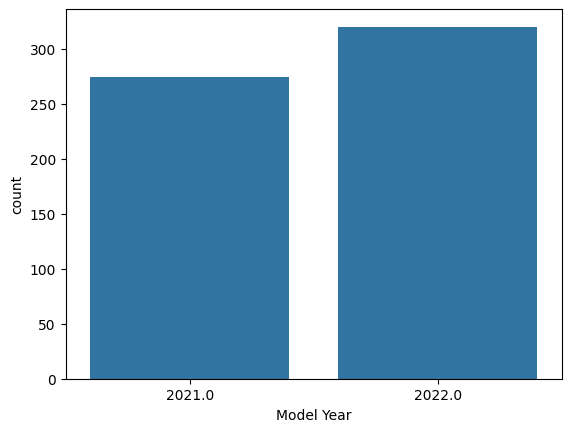

In [544]:

print(len(Alternative_fuel_vehicles_df['Model Year'].unique()))
print(Alternative_fuel_vehicles_df['Model Year'].value_counts())
sns.countplot(data=Alternative_fuel_vehicles_df,x='Model Year')

Vemos que este conjunto de datos solamente tiene modelos lanzados 2021 y 2022, teniendo 2022 un mayor numero de modelos.

81
Manufacturer
Ford             107
Audi              65
Mercedes-Benz     58
BMW               50
Toyota            41
                ... 
FUSO               1
GM BrightDrop      1
Morgan-Olson       1
International      1
Workhorse          1
Name: count, Length: 81, dtype: int64
Manufacturer
Ford             107
Audi              65
Mercedes-Benz     58
BMW               50
Toyota            41
Chevrolet         38
Porsche           34
Hyundai           32
GMC               30
Land Rover        26
Tesla             24
ENC               20
Volvo             19
Lexus             18
Kia               17
Name: count, dtype: int64


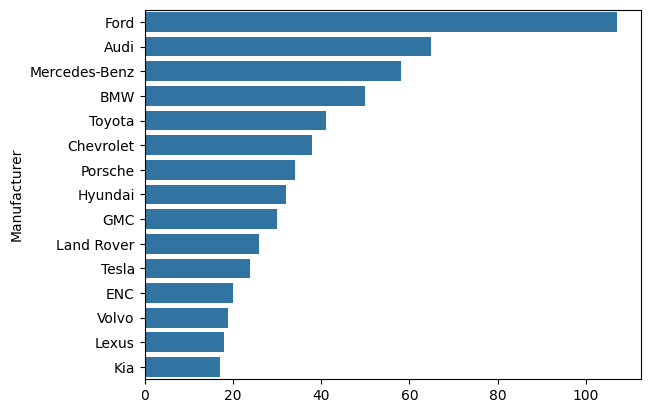

In [545]:


# Se cuanta el numero de categorias y cuantas entradas hay en cada una
print(len(Alternative_fuel_vehicles_df['Manufacturer'].unique()))
print(Alternative_fuel_vehicles_df['Manufacturer'].value_counts())



top_5 = Alternative_fuel_vehicles_df['Manufacturer'].value_counts().head(15)
print(top_5)
# Se crea un gráfico de barras
ax = sns.barplot(x=top_5.values, y=top_5.index, orient='y')

# Se imprime la gráfica
plt.show()

El análisis de la distribución de la variable "Manufacturer" en el conjunto de datos "Alternative Fuel Vehicles" revela que Ford (107) es el fabricante con mayor presencia, seguido de Audi (65), Mercedes-Benz (58), BMW (50) y Toyota (41). Los fabricantes restantes tienen frecuencias variables, con un rango de 1 a 38 vehículos, lo que indica una representación diversa de marcas pero con un dominio significativo de Ford. Esta distribución de cola larga sugiere que algunos fabricantes dominan la frecuencia, mientras que muchos otros tienen un menor número de vehículos. La prevalencia de Ford podría deberse a su enfoque en vehículos con combustibles alternativos o a un sesgo de selección específico en la recopilación de datos. La presencia de varios otros fabricantes indica que múltiples marcas están ingresando al mercado de vehículos con combustibles alternativos. 

22
Fuel
Hybrid Electric                                                                             284
Electric                                                                                    246
Plug-in Hybrid Electric                                                                      95
Biodiesel (B20)                                                                              68
CNG - Compressed Natural Gas                                                                 44
Ethanol (E85)                                                                                43
CNG - Compressed Natural Gas|LNG - Liquified Natural Gas                                     22
Diesel/Hybrid Electric                                                                       17
LNG - Liquified Natural Gas|CNG - Compressed Natural Gas                                     15
Hydrogen Fuel Cell                                                                           14
Propane                         

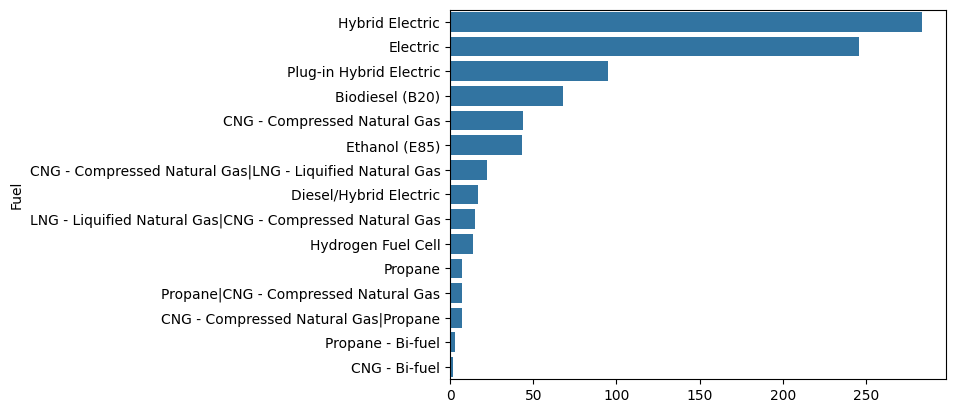

In [546]:

print(len(Alternative_fuel_vehicles_df['Fuel'].unique()))
print(Alternative_fuel_vehicles_df['Fuel'].value_counts())

top_5 = Alternative_fuel_vehicles_df['Fuel'].value_counts().head(15)
print(top_5)
# Se crea un gráfico de barras
ax = sns.barplot(x=top_5.values, y=top_5.index, orient='y')

# Se imprime la gráfica
plt.show()

El análisis de la distribución de la variable "Fuel" en el conjunto de datos "Alternative Fuel Vehicles" revela una diversidad de tecnologías de propulsión alternativas. Los vehículos híbridos eléctricos (284) y eléctricos (246) dominan el conjunto de datos, constituyendo más de la mitad de los vehículos. También están presentes el biodiésel (B20), el gas natural comprimido (GNC), el etanol (E85), la pila de combustible de hidrógeno y el propano, lo que indica una variedad de opciones de combustible alternativo. Además, un pequeño número de vehículos utiliza combinaciones de estos combustibles. Esta distribución diversa sugiere un mercado heterogéneo en términos de preferencias de tecnología de combustible alternativo. 

count    222.000000
mean     165.927928
std      132.992955
min        8.000000
25%       23.000000
50%      203.000000
75%      260.000000
max      520.000000
Name: All-Electric Range, dtype: float64


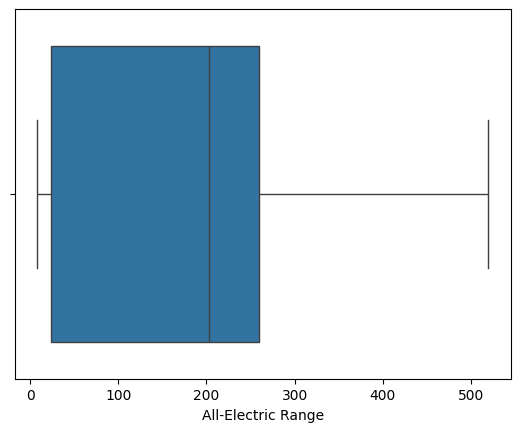

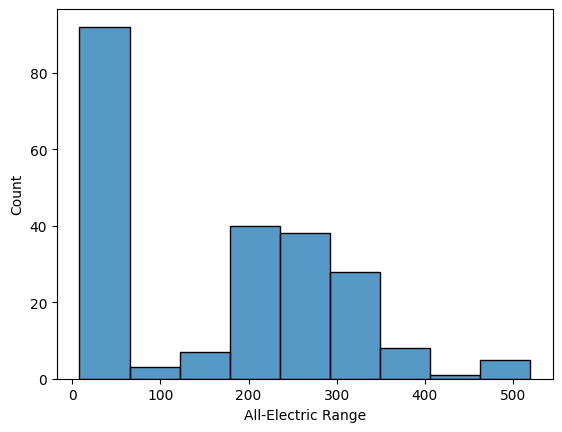

In [547]:
#Variables numerias

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Alternative_fuel_vehicles_df['All-Electric Range'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Alternative_fuel_vehicles_df, x='All-Electric Range')
plt.show()
#Se grafica un histograma
sns.histplot(data=Alternative_fuel_vehicles_df, x='All-Electric Range')
plt.show()

El análisis de la distribución de "All-Electric Range" en el conjunto de datos "Alternative Fuel Vehicles" revela una variedad de capacidades de rango entre los vehículos eléctricos. La media (165.9 millas) y la mediana (203 millas) sugieren que un vehículo eléctrico típico en el conjunto de datos tiene un rango de alrededor de 200 millas. Los valores de rango abarcan desde 8 millas hasta 520 millas, lo que indica una amplia gama de capacidades entre los vehículos eléctricos. La desviación estándar (132.9 millas) destaca la variabilidad en el rango entre los vehículos, lo que sugiere que algunos vehículos eléctricos tienen rangos significativamente más cortos o más largos que el promedio. La distribución parece estar sesgada hacia la derecha, con una mayor concentración de vehículos en las categorías de rango más bajo y un menor número de vehículos con rangos excepcionales.

count     43.000000
mean     450.465116
std       93.042578
min      290.000000
25%      380.000000
50%      460.000000
75%      520.000000
max      640.000000
Name: PHEV Total Range, dtype: float64


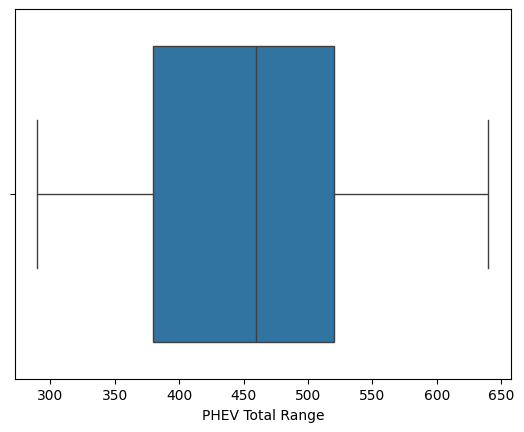

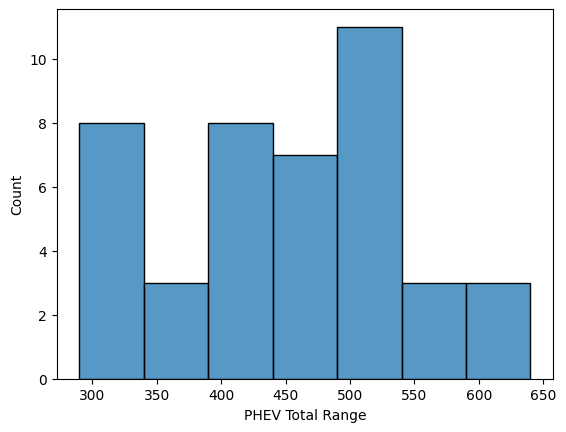

In [548]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Alternative_fuel_vehicles_df['PHEV Total Range'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Alternative_fuel_vehicles_df, x='PHEV Total Range')
plt.show()
#Se grafica un histograma
sns.histplot(data=Alternative_fuel_vehicles_df, x='PHEV Total Range')
plt.show()

El análisis de la distribución de "PHEV Total Range" en el conjunto de datos "Alternative Fuel Vehicles" revela información sobre las capacidades de rango total de los vehículos híbridos enchufables (PHEV). Los PHEV en el conjunto de datos ofrecen una amplia gama de capacidades de rango total, satisfaciendo diversas necesidades de conducción. Los rangos totales promedio y mediano sugieren que los PHEV pueden cubrir distancias significativas tanto en modo eléctrico como en modo híbrido (alrededor de 450-460 millas). La variabilidad en el rango total podría estar influenciada por factores como la capacidad de la batería, la eficiencia del vehículo y el tamaño del tanque de combustible. 

count    262.000000
mean      75.992366
std       32.303279
min       11.000000
25%       56.000000
50%       76.000000
75%      101.000000
max      142.000000
Name: Alternative Fuel Economy Combined, dtype: float64


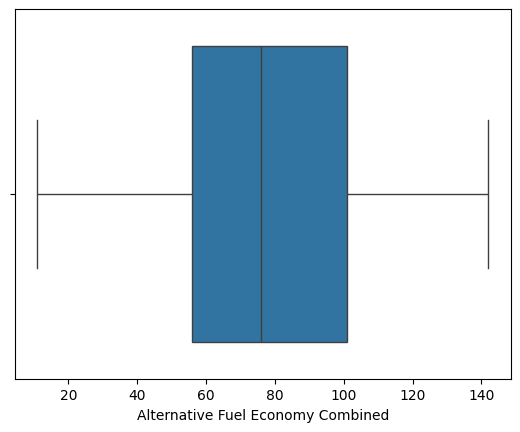

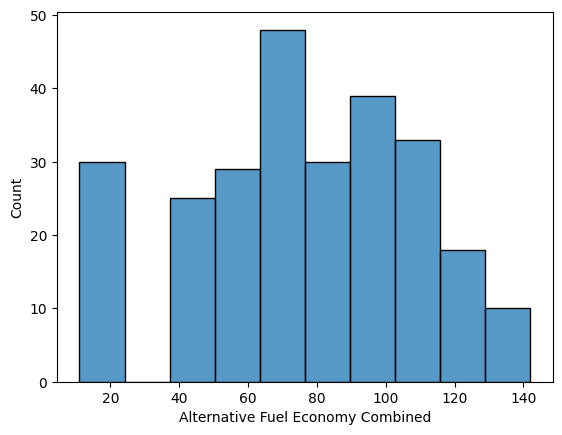

In [549]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Alternative_fuel_vehicles_df['Alternative Fuel Economy Combined'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Alternative_fuel_vehicles_df, x='Alternative Fuel Economy Combined')
plt.show()
#Se grafica un histograma
sns.histplot(data=Alternative_fuel_vehicles_df, x='Alternative Fuel Economy Combined')
plt.show()

El análisis de la distribución de "Alternative Fuel Economy Combined" en el conjunto de datos "Alternative Fuel Vehicles" revela una variedad de economías de combustible promedio para vehículos alternativos. La economía de combustible promedio y mediana es de alrededor de 76 mpg, lo que indica que un vehículo alternativo típico en el conjunto de datos logra una economía de combustible combinada de alrededor de 76 mpg. Sin embargo, existe una variabilidad considerable en la economía de combustible entre los vehículos, con valores que van desde 11 mpg hasta 142 mpg. Esta variabilidad podría estar influenciada por factores como el tipo de vehículo, la tecnología y las condiciones de conducción. Una parte significativa de los vehículos logra una economía de combustible muy por encima de los vehículos de gasolina convencionales, lo que los convierte en opciones atractivas para los consumidores conscientes del medio ambiente.

count    444.000000
mean      27.261261
std        9.803912
min       15.000000
25%       21.000000
50%       24.000000
75%       30.000000
max       59.000000
Name: Conventional Fuel Economy Combined, dtype: float64


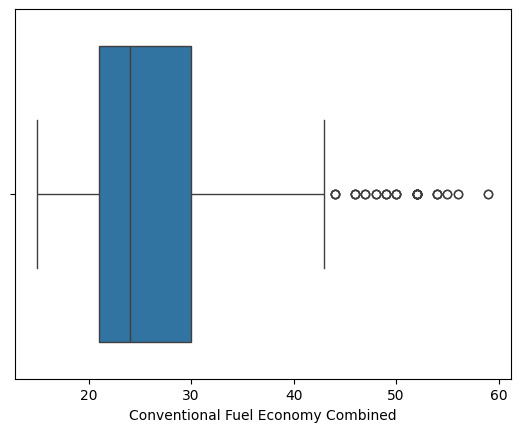

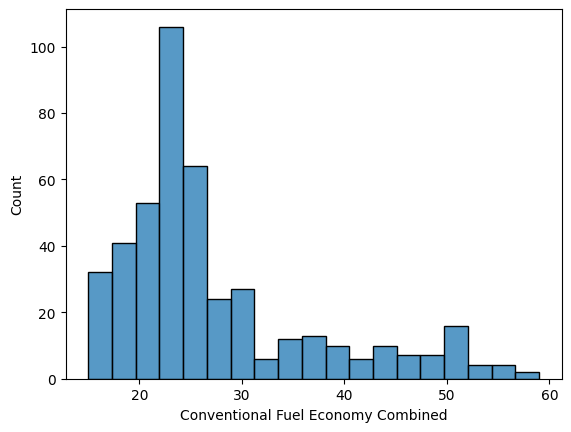

In [550]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Alternative_fuel_vehicles_df['Conventional Fuel Economy Combined'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Alternative_fuel_vehicles_df, x='Conventional Fuel Economy Combined')
plt.show()
#Se grafica un histograma
sns.histplot(data=Alternative_fuel_vehicles_df, x='Conventional Fuel Economy Combined')
plt.show()

El análisis de la distribución de "Conventional Fuel Economy Combined" en el conjunto de datos "Alternative Fuel Vehicles" revela una variedad de economías de combustible promedio para vehículos convencionales. La economía de combustible promedio y mediana es de alrededor de 24-27 mpg, lo que indica que un vehículo convencional típico en el conjunto de datos logra una economía de combustible combinada de alrededor de 24-27 mpg. Sin embargo, existe una variabilidad considerable en la economía de combustible entre los vehículos, con valores que van desde 15 mpg hasta 59 mpg. Esta variabilidad podría estar influenciada por factores como el tamaño del vehículo, el tipo de motor y los hábitos de conducción. Una parte significativa de los vehículos cae por debajo de la economía de combustible promedio de los vehículos eléctricos (alrededor de 76 mpg según el análisis anterior), lo que destaca el potencial ahorro de combustible con la electrificación. 

Light duty vehicles

El conjunto de datos "light_duty_vehicles" contiene información sobre 3008 vehículos ligeros, como automóviles, camionetas y SUV. Cada fila representa un vehículo, y cada columna contiene un atributo específico (modelo, año, economía de combustible, tipo de motor, fabricante, categoría, tipo de combustible, rango eléctrico y rango PHEV).

In [551]:
#Cargar datos
light_duty_vehicles_df=pd.read_csv('Datasets/Light Duty Vehicles.csv',sep=',')

In [552]:
light_duty_vehicles_df.head(5)

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,...,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD


In [553]:
light_duty_vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle ID                          3008 non-null   int64  
 1   Fuel ID                             3008 non-null   int64  
 2   Fuel Configuration ID               2973 non-null   float64
 3   Manufacturer ID                     3008 non-null   int64  
 4   Category ID                         3008 non-null   int64  
 5   Model                               3008 non-null   object 
 6   Model Year                          3008 non-null   int64  
 7   Alternative Fuel Economy City       1595 non-null   float64
 8   Alternative Fuel Economy Highway    1505 non-null   float64
 9   Alternative Fuel Economy Combined   467 non-null    float64
 10  Conventional Fuel Economy City      2044 non-null   float64
 11  Conventional Fuel Economy Highway   2046 no

In [554]:
#Seleccionamos solamente las columnas relevantes para el análisis.
light_duty_vehicles_df=light_duty_vehicles_df[['Model','Model Year','Alternative Fuel Economy Combined','Conventional Fuel Economy Combined','Engine Type','Manufacturer','Category','Fuel','Electric-Only Range','PHEV Total Range']]

In [555]:
#Revisar valores nulos
valores_faltantes = light_duty_vehicles_df.isna().sum()
print(valores_faltantes)

Model                                    0
Model Year                               0
Alternative Fuel Economy Combined     2541
Conventional Fuel Economy Combined    2245
Engine Type                            797
Manufacturer                             0
Category                                 0
Fuel                                     0
Electric-Only Range                   2634
PHEV Total Range                      2965
dtype: int64


El dataset "light_duty_vehicles" presenta información sobre 3008 vehículos ligeros, pero algunas columnas clave tienen valores ausentes. Las columnas sin datos faltantes son "Modelo", "Año del Modelo", "Fabricante", "Categoría" y "Combustible". Sin embargo, otras columnas presentan datos faltantes: "Economía Combinada de Combustible Alternativo" (85%), "Economía Combinada de Combustible Convencional" (75%), "Rango Eléctrico Puro" (88%) y "Rango Total PHEV" (96%). La gran cantidad de valores ausentes en estas columnas podría limitar ciertos análisis. Se recomienda abordar estos valores perdidos o centrarse en los datos completos para análisis específicos. A pesar de los datos faltantes, el dataset sigue siendo valioso para explorar las características generales de los vehículos ligeros.

In [556]:
#Revisar valores duplicados
duplicados = light_duty_vehicles_df[light_duty_vehicles_df.duplicated(keep=False)]

#Se imprimen las filas duplicadas.
print(duplicados)

                    Model  Model Year  Alternative Fuel Economy Combined  \
230        GLE 450 4MATIC        2022                                NaN   
231        GLE 450 4MATIC        2022                                NaN   
505          E 450 4MATIC        2021                                NaN   
506          E 450 4MATIC        2021                                NaN   
698    Yukon XL C1500 2WD        2020                               13.0   
...                   ...         ...                                ...   
2934      Econoline E-250        1998                                NaN   
2951  Econoline Clubwagon        1997                                NaN   
2952  Econoline Clubwagon        1997                                NaN   
2953      Econoline E-250        1997                                NaN   
2955      Econoline E-250        1997                                NaN   

      Conventional Fuel Economy Combined     Engine Type   Manufacturer  \
230         

El dataset incluye 205 filas duplicadas. Se recomienda la eliminación de estas.

In [557]:
#Revisar el tipo de dato
light_duty_vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               3008 non-null   object 
 1   Model Year                          3008 non-null   int64  
 2   Alternative Fuel Economy Combined   467 non-null    float64
 3   Conventional Fuel Economy Combined  763 non-null    float64
 4   Engine Type                         2211 non-null   object 
 5   Manufacturer                        3008 non-null   object 
 6   Category                            3008 non-null   object 
 7   Fuel                                3008 non-null   object 
 8   Electric-Only Range                 374 non-null    float64
 9   PHEV Total Range                    43 non-null     float64
dtypes: float64(4), int64(1), object(5)
memory usage: 235.1+ KB


32
Model Year
2022    320
2021    274
2020    228
2019    220
2018    204
2014    195
2015    192
2017    183
2013    162
2016    158
2012    123
2011    117
2009     59
2010     57
2008     50
2002     48
2003     47
2007     46
2001     44
1999     43
2004     40
2000     39
2005     37
2006     36
1998     25
1997     17
1995     13
1996     12
1993      7
1994      5
1992      5
1991      2
Name: count, dtype: int64


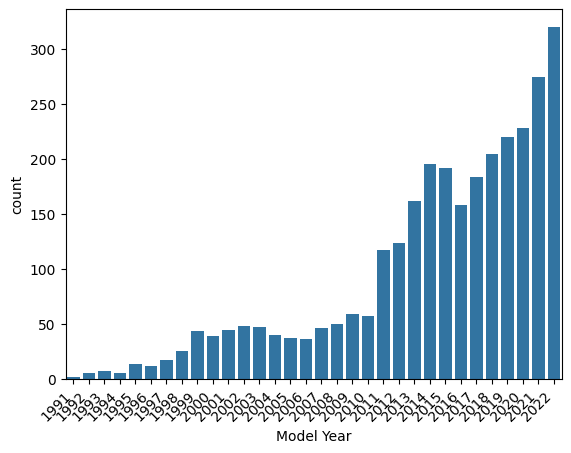

In [558]:
print(len(light_duty_vehicles_df['Model Year'].unique()))
print(light_duty_vehicles_df['Model Year'].value_counts())

ax = sns.countplot(x="Model Year", data=light_duty_vehicles_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

El dataset presenta una clara prevalencia de modelos más recientes, con un aumento significativo en el número de vehículos a partir del 2018. Esto indica que el conjunto de datos se centra principalmente en vehículos de los últimos años.El año 2022 tiene el mayor número de vehículos (320), lo que sugiere que el dataset podría incluir vehículos recientemente fabricados o registrados.

116
Engine Type
SI                                  1287
e-motor                              261
CI                                   176
Vortec 5300                           61
Triton modular                        39
                                    ... 
3-valve dedicated propane engine       1
EFI                                    1
5-speed automatic                      1
GM Vortec engine                       1
V6, Hybrid                             1
Name: count, Length: 115, dtype: int64


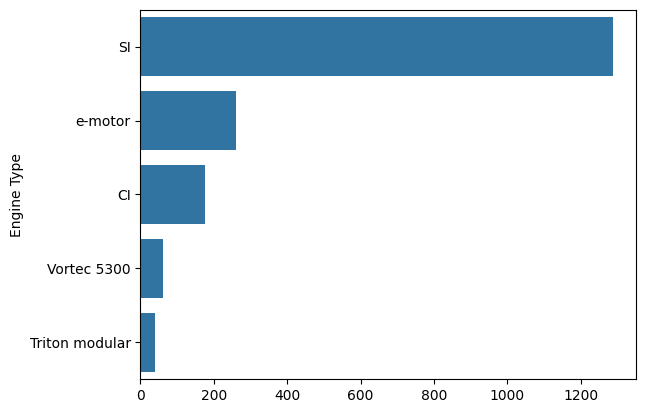

In [559]:
print(len(light_duty_vehicles_df['Engine Type'].unique()))
print(light_duty_vehicles_df['Engine Type'].value_counts())
top_5 = light_duty_vehicles_df['Engine Type'].value_counts().head(5)
# Se crea un gráfico de barras
ax = sns.barplot(x=top_5.values, y=top_5.index, orient='y')

# Se imprime la gráfica
plt.show()

El conjunto de datos se compone principalmente de vehículos con motores de encendido por chispa (SI), representando alrededor del 11% del total. Esto indica un enfoque en vehículos a gasolina. Si bien los motores SI dominan, hay una presencia de vehículos eléctricos (e-motor) y otros tipos de motores como CI, Vortec 5300 y Triton modular. La representación de vehículos alternativos a la gasolina es limitada, con solo un pequeño número de vehículos eléctricos y de propano. La cantidad de vehículos con motores SI podría ser suficiente para analizar sus características y tendencias, mientras que la baja presencia de otros tipos de motores podría limitar el análisis en profundidad de estos.

55
Manufacturer
Ford                          533
Chevrolet                     371
GMC                           252
Toyota                        193
Mercedes-Benz                 146
Dodge                         130
Audi                          118
BMW                           110
Honda                          99
Tesla                          93
Lexus                          87
Porsche                        76
Nissan                         76
Hyundai                        74
Chrysler                       63
Ram                            57
Kia                            53
Land Rover                     49
Jeep                           38
Jaguar                         34
Volvo                          33
Cadillac                       33
Lincoln                        28
Volkswagen                     25
Buick                          23
Mercury                        23
Infiniti                       22
Bentley Motors                 20
Acura                          1

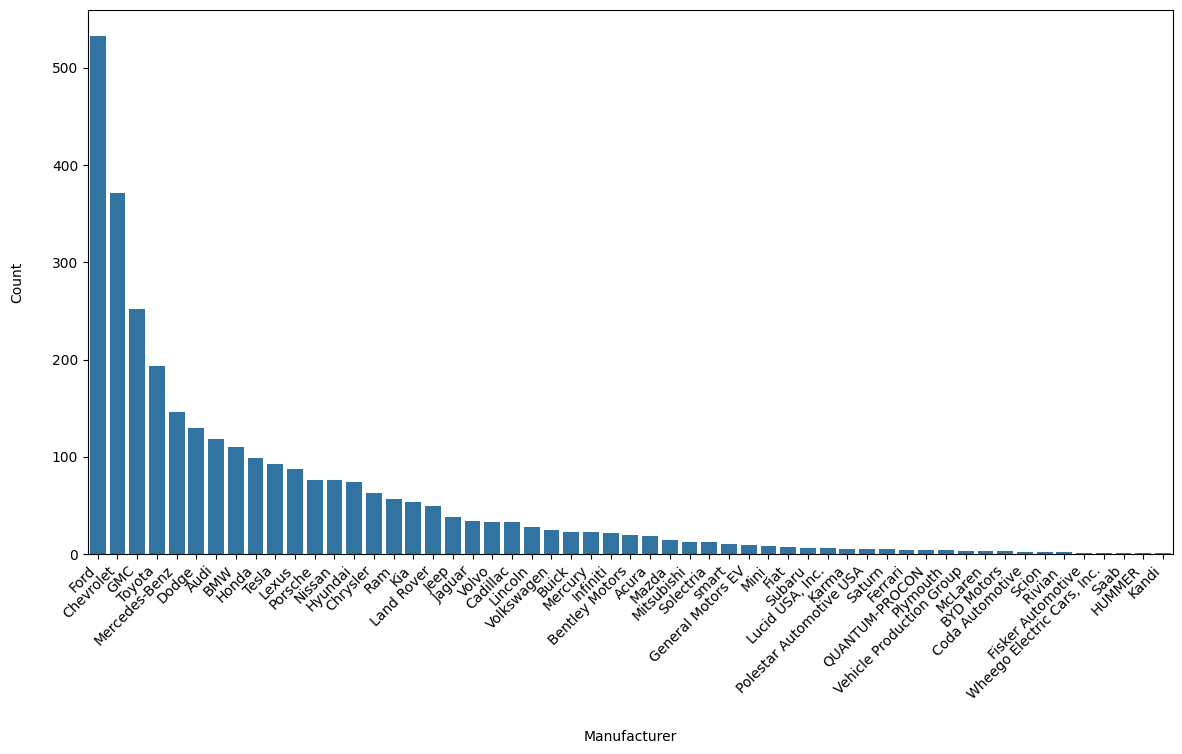

In [560]:
# Print the number of unique manufacturers and their counts
print(len(light_duty_vehicles_df['Manufacturer'].unique()))
print(light_duty_vehicles_df['Manufacturer'].value_counts())

# Get the sorted counts of manufacturers
brand_counts = light_duty_vehicles_df['Manufacturer'].value_counts()
brand_counts_sorted_index = brand_counts.sort_values(ascending=False).index

# Create a larger figure
plt.figure(figsize=(14, 8))

# Plot the count plot
ax = sns.countplot(x="Manufacturer", data=light_duty_vehicles_df, order=brand_counts_sorted_index)

# Rotate the x-axis labels and set alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Set more spacing for the x-axis labels
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Manufacturer', labelpad=20)  # Adjust the labelpad to increase spacing
ax.set_ylabel('Count', labelpad=20)  # Optionally adjust the y-axis label padding

# Adjust subplot parameters to give more room for the labels
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()

El conjunto de datos está dominado por marcas estadounidenses como Ford, Chevrolet y GMC, que representan más de la mitad de los vehículos. También hay una presencia significativa de marcas asiáticas y europeas, lo que indica una variedad de fabricantes. Se incluyen algunas marcas de automóviles de lujo, pero la representación de marcas de nicho es limitada. En general, la distribución de fabricantes sugiere un enfoque en marcas comunes y populares, con una menor presencia de marcas menos conocidas.

6
Category
Sedan/Wagon                  1305
SUV                           778
Pickup                        553
Van                           330
Vocational/Cab Chassis         32
Passenger Van/Shuttle Bus      10
Name: count, dtype: int64


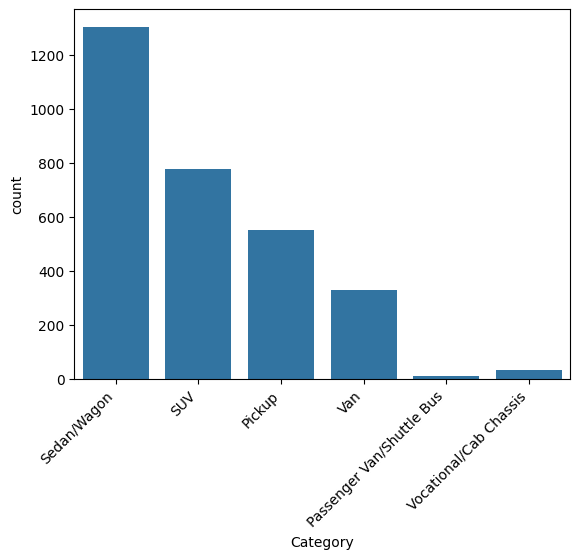

In [561]:

print(len(light_duty_vehicles_df['Category'].unique()))
print(light_duty_vehicles_df['Category'].value_counts())
ax = sns.countplot(x="Category", data=light_duty_vehicles_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

El conjunto de datos se centra en automóviles de pasajeros, con una fuerte presencia de sedanes (47%), SUV (28%) y camionetas pickup (20%). Las furgonetas representan el 12% y los vehículos especializados, el 1%. La distribución refleja las preferencias de los consumidores y puede ser útil para analizar tendencias de ventas, preferencias de compra o patrones de uso de vehículos según su tipo.

11
Fuel
Ethanol (E85)                   922
Hybrid Electric                 810
Electric                        378
Plug-in Hybrid Electric         282
CNG - Compressed Natural Gas    231
Biodiesel (B20)                 200
Propane                          75
Hydrogen Fuel Cell               36
CNG - Bi-fuel                    36
Propane - Bi-fuel                24
Methanol                         14
Name: count, dtype: int64


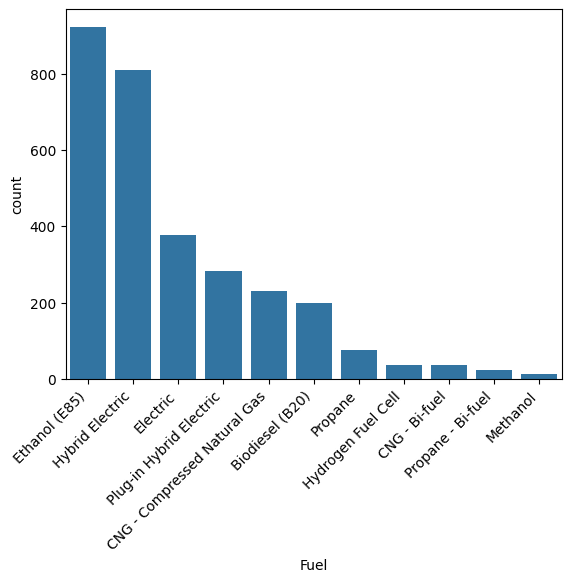

In [562]:

print(len(light_duty_vehicles_df['Fuel'].unique()))
print(light_duty_vehicles_df['Fuel'].value_counts())
counts = light_duty_vehicles_df['Fuel'].value_counts()
counts_sorted = counts.sort_values(ascending=False)
ax = sns.countplot(x="Fuel", data=light_duty_vehicles_df, order=counts_sorted.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

El conjunto de datos se centra en vehículos con combustibles alternativos, con una fuerte presencia de E85 (33%), Electric (14%) e Hybrid Electric (29%). La gasolina sigue presente, pero en menor medida (8%). Otros combustibles alternativos como Biodiesel, Propano e Hidrógeno tienen una representación limitada. La distribución refleja un enfoque en la reducción de emisiones y la exploración de alternativas a la gasolina.

count    467.000000
mean      72.126338
std       36.776309
min       10.000000
25%       49.000000
50%       74.000000
75%      103.500000
max      142.000000
Name: Alternative Fuel Economy Combined, dtype: float64


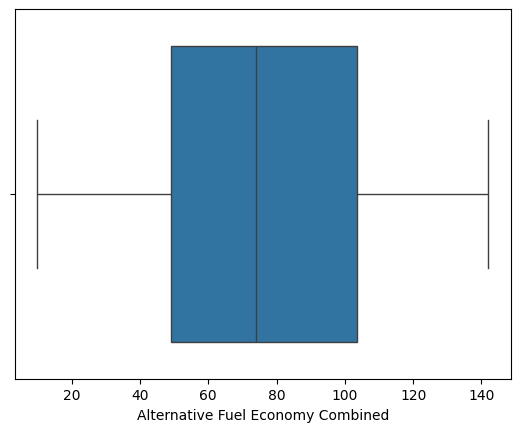

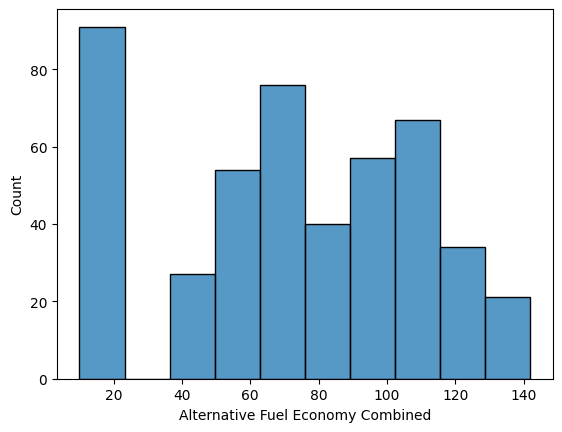

In [563]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(light_duty_vehicles_df['Alternative Fuel Economy Combined'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=light_duty_vehicles_df, x='Alternative Fuel Economy Combined')
plt.show()
#Se grafica un histograma
sns.histplot(data=light_duty_vehicles_df, x='Alternative Fuel Economy Combined')
plt.show()

Los vehículos alternativos en el conjunto de datos tienen una economía de combustible combinada promedio de 72.13 mpg, con una variabilidad considerable (desviación estándar de 36.78 mpg). La distribución de eficiencia abarca un rango amplio, desde 10 mpg hasta 142 mpg. Esto indica una variedad de tecnologías y niveles de eficiencia entre los vehículos alternativos.

count    763.000000
mean      27.832241
std       10.265666
min       15.000000
25%       21.000000
50%       24.000000
75%       31.000000
max       59.000000
Name: Conventional Fuel Economy Combined, dtype: float64


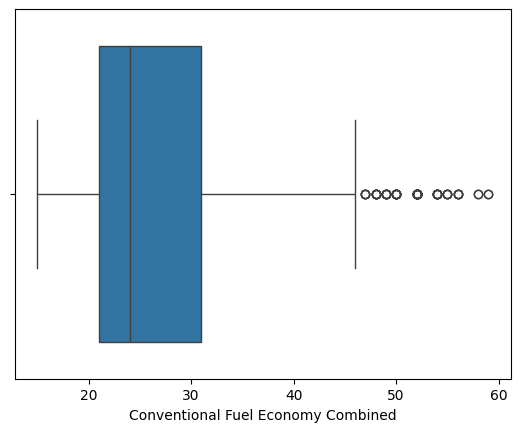

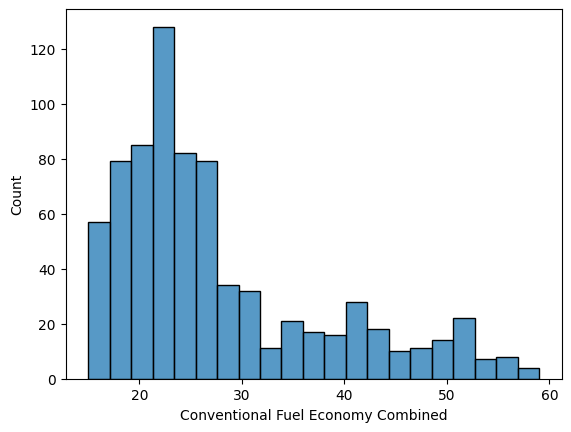

In [564]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(light_duty_vehicles_df['Conventional Fuel Economy Combined'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=light_duty_vehicles_df, x='Conventional Fuel Economy Combined')
plt.show()
#Se grafica un histograma
sns.histplot(data=light_duty_vehicles_df, x='Conventional Fuel Economy Combined')
plt.show()

Los vehículos convencionales en el conjunto de datos tienen una economía de combustible combinada promedio de 27.83 mpg, con una distribución normal. La mitad de los vehículos se encuentran dentro del rango de 21 mpg a 31 mpg. Se observa una variabilidad moderada en la eficiencia, con un mínimo de 15 mpg y un máximo de 59 mpg.

count    374.000000
mean     148.251337
std      128.708353
min        8.000000
25%       21.000000
50%      126.000000
75%      254.750000
max      520.000000
Name: Electric-Only Range, dtype: float64


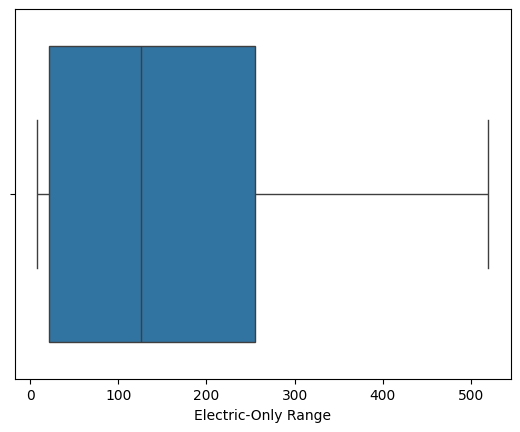

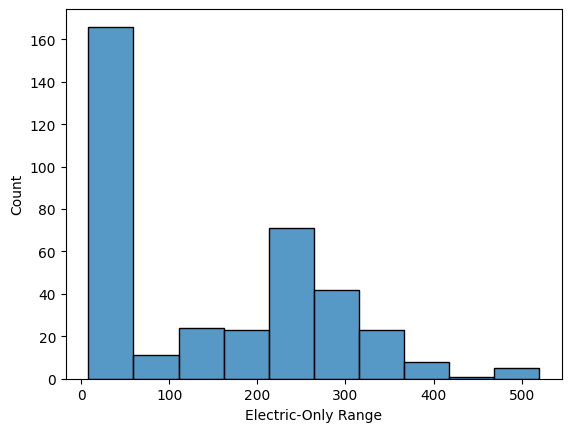

In [565]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(light_duty_vehicles_df['Electric-Only Range'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=light_duty_vehicles_df, x='Electric-Only Range')
plt.show()
#Se grafica un histograma
sns.histplot(data=light_duty_vehicles_df, x='Electric-Only Range')
plt.show()

Los vehículos eléctricos en el conjunto de datos tienen una autonomía eléctrica promedio de 148.25 millas, con una variabilidad considerable que va desde 8 millas hasta 520 millas. La distribución de la autonomía no es perfectamente normal, con una mayor concentración de vehículos en el rango inferior de autonomía. Esta información puede ser útil para comprender las capacidades y limitaciones de los vehículos eléctricos en el conjunto de datos.

count     43.000000
mean     450.465116
std       93.042578
min      290.000000
25%      380.000000
50%      460.000000
75%      520.000000
max      640.000000
Name: PHEV Total Range, dtype: float64


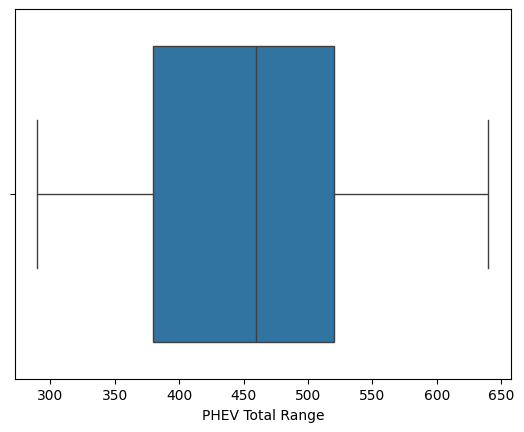

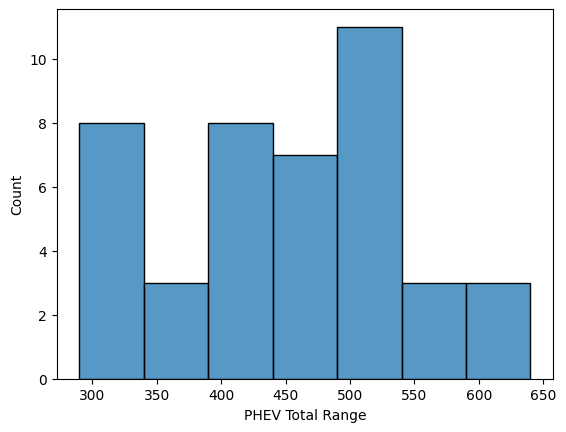

In [566]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(light_duty_vehicles_df['PHEV Total Range'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=light_duty_vehicles_df, x='PHEV Total Range')
plt.show()
#Se grafica un histograma
sns.histplot(data=light_duty_vehicles_df, x='PHEV Total Range')
plt.show()

Los vehículos híbridos enchufables (PHEV) en el conjunto de datos tienen una autonomía total promedio de 450.47 millas, con una variabilidad moderada que va desde 290 millas hasta 640 millas. La distribución de la autonomía no es perfectamente normal, con una mayor concentración de vehículos en el rango medio de autonomía. Esta información puede ser útil para comprender las capacidades y limitaciones de los PHEV en el conjunto de datos.

Vehicle fuel economy

contiene información sobre varios modelos de coches de distintos fabricantes a lo largo de varios años. Los datos incluyen detalles como el tipo de combustible, el consumo combinado, las emisiones de CO2 y la autonomía. Este conjunto de datos parece útil para analizar las tendencias de eficiencia de combustible en distintos modelos de coche.

In [567]:
#Cargar datos
Vehicle_fuel_economy_df=pd.read_csv('Datasets/Vehicle Fuel Economy Data.csv',sep=',')

In [568]:
Vehicle_fuel_economy_df.head(5)

,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,09-09-2016,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,22-11-2016,Y,0.0,0.0,0.0
2,2016,Infiniti,Q50S Red Sport,13.523182,0.0,0.0,20.0,19.0,0.0,0.0,...,NSX,NaN,0.0,NaN,04-04-2016,26-09-2016,N,0.0,0.0,0.0
3,2017,MINI,John Cooper Works Convertible,11.018889,0.0,0.0,24.0,23.0,0.0,0.0,...,BMX,NaN,0.0,NaN,12-04-2016,16-09-2016,Y,0.0,0.0,0.0
4,2017,Kia,Sedona SX,14.167143,0.0,0.0,18.0,18.0,0.0,0.0,...,KMX,NaN,0.0,NaN,12-04-2016,02-12-2016,N,0.0,0.0,0.0


In [569]:
Vehicle_fuel_economy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46186 entries, 0 to 46185
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             46186 non-null  int64  
 1   Manufacturer     46186 non-null  object 
 2   Model            46176 non-null  object 
 3   barrels08        46169 non-null  float64
 4   barrelsA08       46169 non-null  float64
 5   charge240        46169 non-null  float64
 6   city08           46169 non-null  float64
 7   city08U          46169 non-null  float64
 8   cityA08          46169 non-null  float64
 9   cityA08U         46169 non-null  float64
 10  cityCD           46169 non-null  float64
 11  cityE            46169 non-null  float64
 12  cityUF           46169 non-null  float64
 13  co2              46169 non-null  float64
 14  co2A             46169 non-null  float64
 15  co2TailpipeAGpm  46169 non-null  float64
 16  co2TailpipeGpm   46169 non-null  float64
 17  comb08      

In [570]:
#Se eligen solamente las columnas relevantes para el análisis.
Vehicle_fuel_economy_df=Vehicle_fuel_economy_df[['Year','Manufacturer','Model','fuelType','fuelType1','fuelType2','comb08','combA08','co2','co2A','range','rangeCity','rangeHwy','fuelCost08','fuelCostA08','youSaveSpend']]

In [571]:
#Revisar valores nulos
valores_faltantes = Vehicle_fuel_economy_df.isna().sum()
print(valores_faltantes)

Year                0
Manufacturer        0
Model              10
fuelType         1233
fuelType1        1233
fuelType2       44539
comb08             17
combA08            17
co2                17
co2A               17
range            1994
rangeCity        1994
rangeHwy         1994
fuelCost08       1233
fuelCostA08      1233
youSaveSpend     1994
dtype: int64


El análisis del conteo de valores nulos en el dataset "Vehicle fuel economy" revela que existen datos faltantes en varias columnas. La mayoría de los datos están completos en las columnas "Year" y "Manufacturer", mientras que otras columnas como "fuelType2" tienen un gran número de valores nulos (más del 90%). Las columnas relacionadas con la autonomía ("range", "rangeCity", "rangeHwy" y "youSaveSpend") también tienen una cantidad considerable de datos faltantes (alrededor del 5%). Es importante tener en cuenta la presencia de estos valores nulos y decidir cómo manejarlos antes de realizar cualquier análisis con el conjunto de datos.

In [572]:
#Revisar valores duplicados
duplicados = Vehicle_fuel_economy_df[Vehicle_fuel_economy_df.duplicated(keep=False)]

#Se imprimen las filas duplicadas.
print(duplicados)

       Year Manufacturer                Model fuelType         fuelType1  \
7      1987          GMC       R15 Pickup 2WD  Regular  Regular Gasoline   
16     1987          GMC       R15 Pickup 2WD   Diesel            Diesel   
21     1987          GMC       R25 Pickup 2WD  Regular  Regular Gasoline   
24     1987          GMC       R25 Pickup 2WD  Regular  Regular Gasoline   
27     1987          GMC       R25 Pickup 2WD  Regular  Regular Gasoline   
...     ...          ...                  ...      ...               ...   
46178  1993   Mitsubishi             Diamante  Premium  Premium Gasoline   
46180  1985        Dodge  B150/B250 Wagon 2WD  Regular  Regular Gasoline   
46181  1993     Plymouth      Sundance/Duster  Regular  Regular Gasoline   
46183  1993         Saab                  900      NaN               NaN   
46185  1993       Subaru           Legacy AWD  Regular  Regular Gasoline   

      fuelType2  comb08  combA08  co2  co2A  range  rangeCity  rangeHwy  \
7           

Vemos que hay una alta cantidad de valores duplicados en este dataset.

In [573]:
Vehicle_fuel_economy_df.drop_duplicates(inplace=True)

In [574]:
#Revisar tipos de datos
Vehicle_fuel_economy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39705 entries, 0 to 46184
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          39705 non-null  int64  
 1   Manufacturer  39705 non-null  object 
 2   Model         39700 non-null  object 
 3   fuelType      38665 non-null  object 
 4   fuelType1     38665 non-null  object 
 5   fuelType2     1616 non-null   object 
 6   comb08        39694 non-null  float64
 7   combA08       39694 non-null  float64
 8   co2           39694 non-null  float64
 9   co2A          39694 non-null  float64
 10  range         38033 non-null  float64
 11  rangeCity     38033 non-null  float64
 12  rangeHwy      38033 non-null  float64
 13  fuelCost08    38665 non-null  float64
 14  fuelCostA08   38665 non-null  float64
 15  youSaveSpend  38033 non-null  float64
dtypes: float64(10), int64(1), object(5)
memory usage: 5.1+ MB


Vemos que las columnas corresponden con el tipo de valor esperado.

41
Year
2018    1341
2019    1339
2022    1306
2017    1282
2015    1275
2021    1270
2016    1254
2020    1248
2023    1244
2014    1205
2013    1163
1985    1111
1984    1109
2012    1039
2008    1011
2009    1006
2011    1005
2007     971
2010     970
1986     969
1987     962
2005     951
1989     939
1991     924
1992     918
2006     913
1988     913
2004     912
1993     886
1990     855
2003     840
2002     801
1994     794
1995     756
2001     744
1999     699
2000     688
1998     665
1996     654
1997     638
2024     135
Name: count, dtype: int64


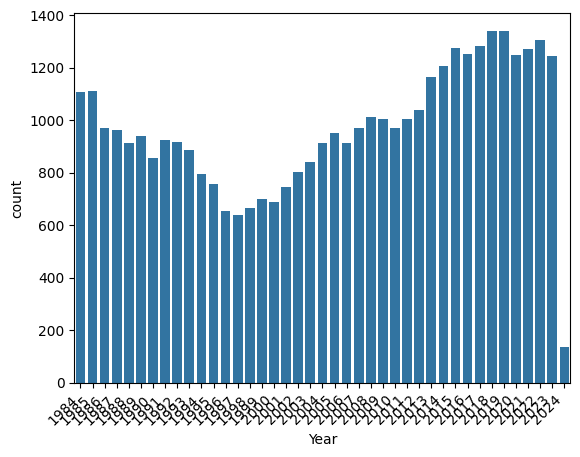

In [575]:
#Variables categoricas


print(len(Vehicle_fuel_economy_df['Year'].unique()))
print(Vehicle_fuel_economy_df['Year'].value_counts())

ax = sns.countplot(x="Year", data=Vehicle_fuel_economy_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

El análisis de la distribución de la variable "Year" en el dataset "Vehicle fuel economy" revela que la mayoría de los vehículos provienen de los últimos años (2014-2024), con una representación uniforme entre esos años. Se observa un ligero sesgo hacia los modelos más recientes, con 2018, 2019, 2022 y 2017 siendo los años con mayor cantidad de vehículos. No hay presencia de vehículos fabricados antes de 1984. Esta distribución sugiere que el dataset es útil para analizar tendencias recientes en la economía de combustible, pero puede tener limitaciones para evaluar tendencias a largo plazo.

142
Manufacturer
Chevrolet                             3454
Ford                                  3054
GMC                                   2110
BMW                                   2104
Dodge                                 2069
                                      ... 
Isis Imports Ltd                         1
S and S Coach Company  E.p. Dutton       1
Fisker                                   1
Panos                                    1
General Motors                           1
Name: count, Length: 142, dtype: int64
Manufacturer
Chevrolet        3454
Ford             3054
GMC              2110
BMW              2104
Dodge            2069
Toyota           2053
Mercedes-Benz    1777
Nissan           1422
Porsche          1251
Volkswagen       1162
Audi             1101
Honda            1001
Mitsubishi        943
Mazda             943
Jeep              939
Name: count, dtype: int64


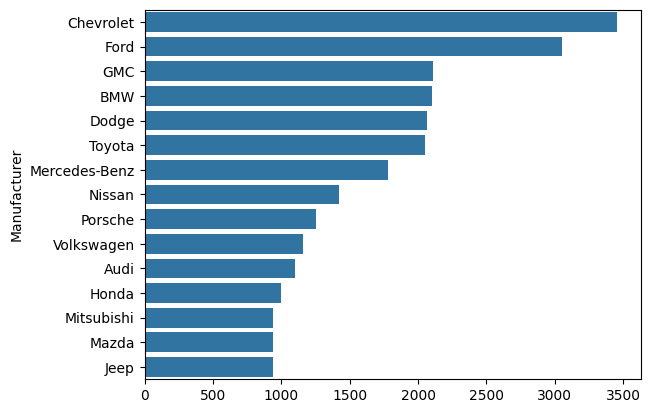

In [576]:

print(len(Vehicle_fuel_economy_df['Manufacturer'].unique()))
print(Vehicle_fuel_economy_df['Manufacturer'].value_counts())



top_5 = Vehicle_fuel_economy_df['Manufacturer'].value_counts().head(15)
print(top_5)
# Se crea un gráfico de barras
ax = sns.barplot(x=top_5.values, y=top_5.index, orient='y')

# Se imprime la gráfica
plt.show()

El análisis de la variable "Manufacturer" en el dataset "Vehicle fuel economy" muestra una distribución diversa de marcas de automóviles, con un dominio de Chevrolet, Ford y GMC, que representan más del 20% de los vehículos. Se observa una amplia variedad de marcas más allá de las 3 principales, con presencia de fabricantes como BMW, Dodge, Toyota, Mercedes-Benz y Nissan. También existe una "cola larga" de marcas menos frecuentes con solo unos pocos vehículos cada una. Esta diversidad puede ser útil para analizar las tendencias de economía de combustible entre diferentes fabricantes de automóviles.

15
fuelType
Regular                        22930
Premium                        12265
Gasoline or E85                 1357
Diesel                           943
Electricity                      503
Midgrade                         157
Premium and Electricity          153
Premium or E85                   126
Regular Gas and Electricity       84
CNG                               60
Premium Gas or Electricity        55
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         4
Name: count, dtype: int64


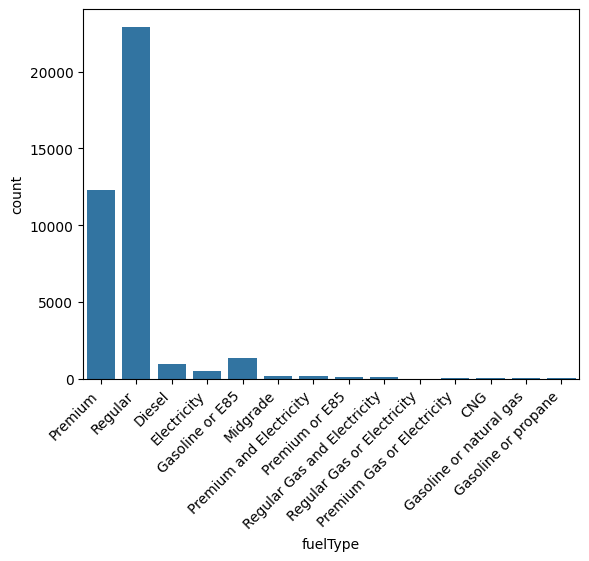

In [577]:

print(len(Vehicle_fuel_economy_df['fuelType'].unique()))
print(Vehicle_fuel_economy_df['fuelType'].value_counts())
ax = sns.countplot(x="fuelType", data=Vehicle_fuel_economy_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

El análisis de la variable "fuelType" en el dataset "Vehicle fuel economy" revela que los combustibles a base de gasolina (Regular, Premium y combinaciones con E85) son los más predominantes, representando más del 80% de los vehículos. Se observa también una presencia considerable de combustibles alternativos como Electricidad (503), Diesel (943) y CNG (60), lo que indica una tendencia hacia la diversificación en cuanto a las opciones de combustible. Las opciones híbridas como Premium and Electricity o Regular Gas and Electricity tienen una representación menos significativa.



7
fuelType1
Regular Gasoline     24403
Premium Gasoline     12599
Diesel                 943
Electricity            503
Midgrade Gasoline      157
Natural Gas             60
Name: count, dtype: int64


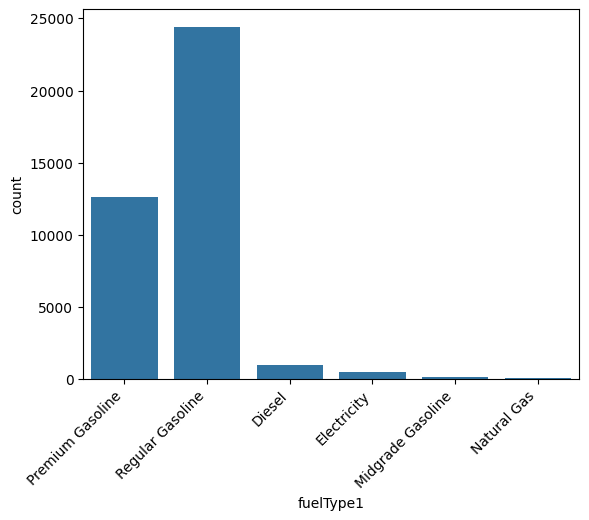

In [578]:

print(len(Vehicle_fuel_economy_df['fuelType1'].unique()))
print(Vehicle_fuel_economy_df['fuelType1'].value_counts())
ax = sns.countplot(x="fuelType1", data=Vehicle_fuel_economy_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

El análisis de la variable "fuelType1" en el dataset "Vehicle fuel economy" indica que los combustibles a base de gasolina, principalmente Regular Gasoline (24403) y Premium Gasoline (12599), son los más predominantes, representando más del 80% de los vehículos. Se observa una presencia limitada de combustibles alternativos como Diesel (943), Electricidad (503) y Natural Gas (60), lo que sugiere que las opciones de combustible convencionales siguen dominando el dataset.

5
fuelType2
E85            1296
Electricity     296
Natural Gas      16
Propane           8
Name: count, dtype: int64


<Axes: xlabel='fuelType2', ylabel='count'>

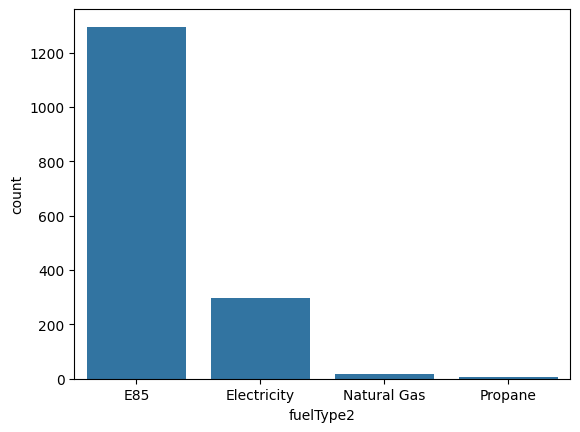

In [579]:

print(len(Vehicle_fuel_economy_df['fuelType2'].unique()))
print(Vehicle_fuel_economy_df['fuelType2'].value_counts())
sns.countplot(data=Vehicle_fuel_economy_df,x='fuelType2')

El análisis de la variable "fuelType2" en el dataset "Vehicle fuel economy" indica que los combustibles secundarios son menos comunes que los primarios. E85 es el combustible secundario más frecuente, seguido de la electricidad, el gas natural y el propano. Esto sugiere que la mayoría de los vehículos en el dataset dependen principalmente de un solo tipo de combustible.

count    39694.000000
mean       138.724719
std        202.739996
min         -1.000000
25%         -1.000000
50%         -1.000000
75%        342.000000
max        979.000000
Name: co2, dtype: float64


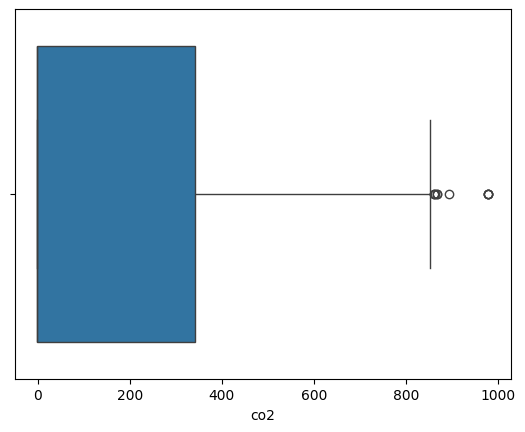

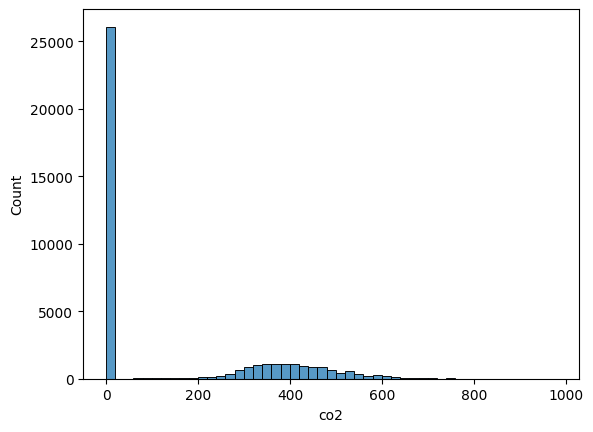

In [580]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Vehicle_fuel_economy_df['co2'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Vehicle_fuel_economy_df, x='co2')
plt.show()
#Se grafica un histograma
sns.histplot(data=Vehicle_fuel_economy_df, x='co2')
plt.show()

El análisis de la variable "co2" en el dataset revela que los datos de emisiones de CO2 presentan anomalías, como valores mínimos, primer cuartil y segundo cuartil iguales a -1, lo que sugiere errores en la medición o en los datos. La distribución anormal dificulta la interpretación del promedio y la desviación estándar. Se recomienda revisar y limpiar los datos antes de realizar análisis más profundos sobre las emisiones de CO2.

count    39694.000000
mean         6.886557
std         61.187639
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        713.000000
Name: co2A, dtype: float64


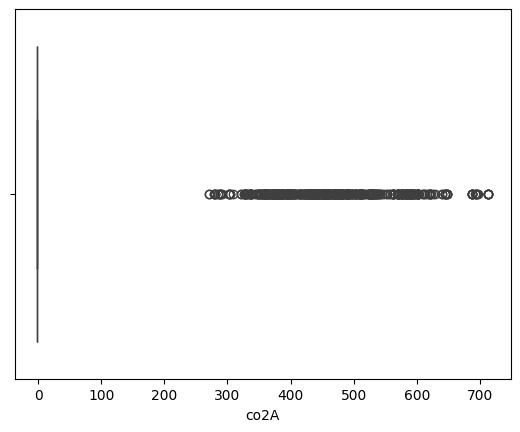

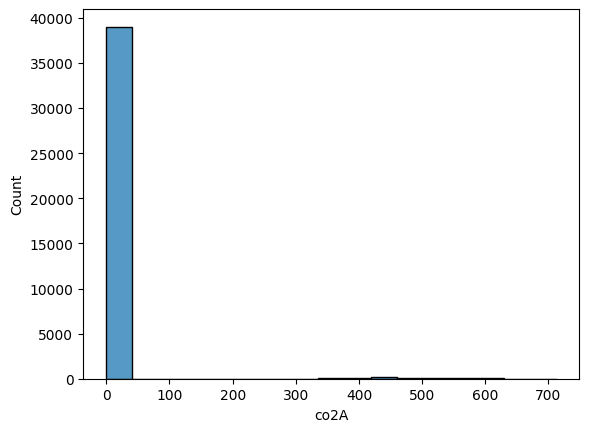

In [581]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Vehicle_fuel_economy_df['co2A'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Vehicle_fuel_economy_df, x='co2A')
plt.show()
#Se grafica un histograma
sns.histplot(data=Vehicle_fuel_economy_df, x='co2A')
plt.show()

El análisis de la variable "co2A" en el conjunto de datos revela que los datos de emisiones de CO2 presentan una distribución anormal, con una gran cantidad de valores muy bajos o incluso negativos. Esto sugiere que podría haber errores en los datos o que la variable no se midió correctamente. Además, la distribución anormal de los datos dificulta la interpretación del promedio y la desviación estándar. 

count    39694.000000
mean        21.816446
std         10.466044
min          7.000000
25%         17.000000
50%         20.000000
75%         24.000000
max        142.000000
Name: comb08, dtype: float64


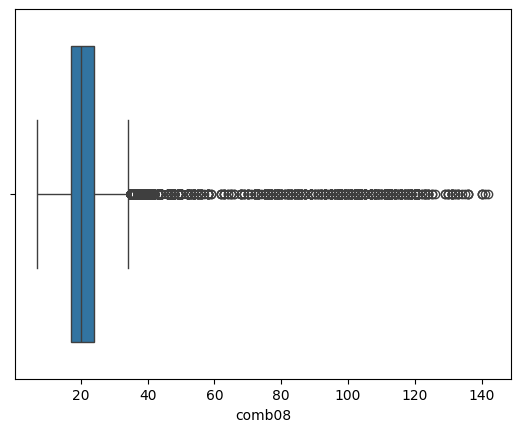

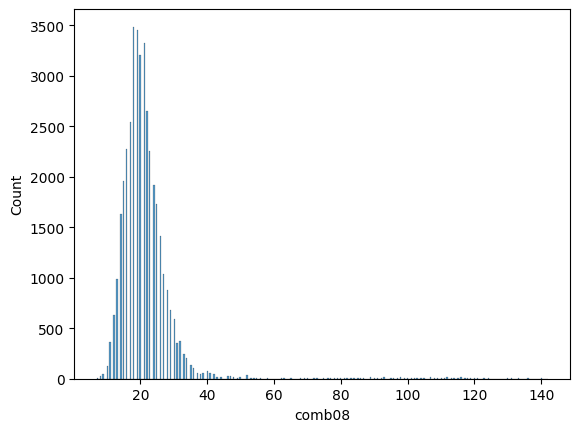

In [582]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Vehicle_fuel_economy_df['comb08'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Vehicle_fuel_economy_df, x='comb08')
plt.show()
#Se grafica un histograma
sns.histplot(data=Vehicle_fuel_economy_df, x='comb08')
plt.show()

El análisis de la variable "comb08" revela que no sigue una distribución normal y presenta una asimetría positiva. El promedio de los valores es de 21.816446, indicando que la mayoría de los vehículos tienen valores cercanos a 22. La desviación estándar de 10.466044 indica una variabilidad moderada en los valores. Los valores mínimos y máximos son 7 y 142, respectivamente, y la mediana es de 20.

count    39694.000000
mean         1.031289
std          6.894144
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        133.000000
Name: combA08, dtype: float64


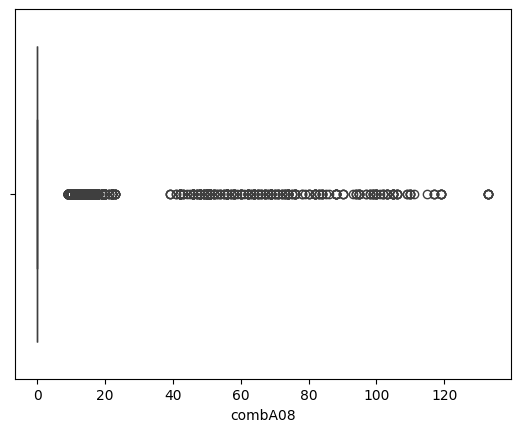

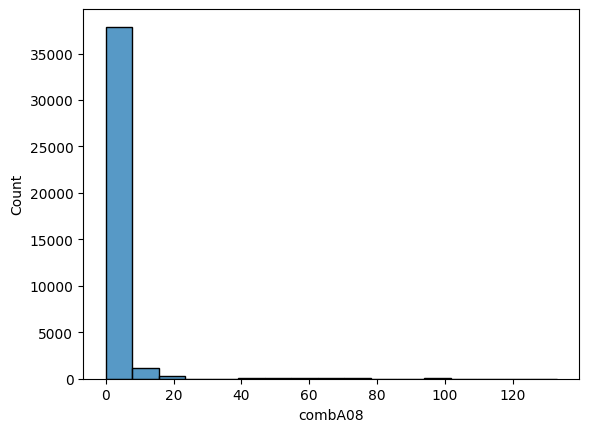

In [583]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Vehicle_fuel_economy_df['combA08'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Vehicle_fuel_economy_df, x='combA08')
plt.show()
#Se grafica un histograma
sns.histplot(data=Vehicle_fuel_economy_df, x='combA08')
plt.show()

La variable "combA08" presenta un comportamiento peculiar, con una distribución altamente concentrada en valores cercanos a 0 y una asimetría positiva extrema. Si bien el promedio es de 1.03, la mayoría de los vehículos tienen valores de 0, lo que indica que la variable podría no estar capturando adecuadamente la información que se pretende medir. 

count    38665.000000
mean      2908.445623
std        863.722806
min        500.000000
25%       2300.000000
50%       2800.000000
75%       3450.000000
max       9350.000000
Name: fuelCost08, dtype: float64


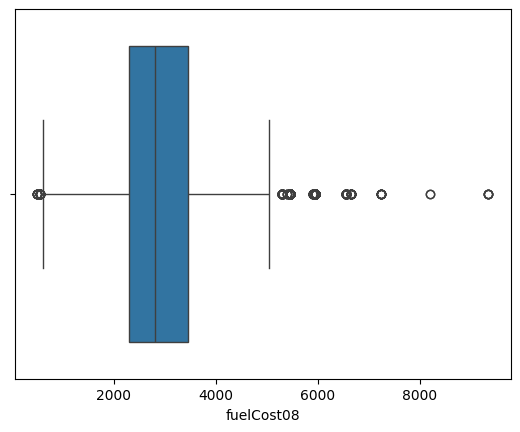

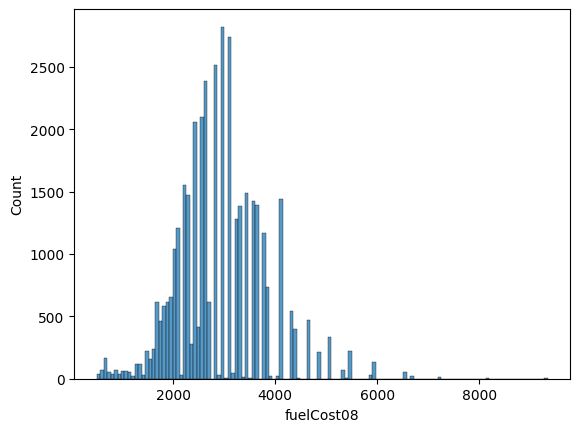

In [584]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Vehicle_fuel_economy_df['fuelCost08'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Vehicle_fuel_economy_df, x='fuelCost08')
plt.show()
#Se grafica un histograma
sns.histplot(data=Vehicle_fuel_economy_df, x='fuelCost08')
plt.show()

El costo promedio del combustible para los vehículos en el dataset es de aproximadamente 2908 dólares por galón, con una variabilidad moderada entre los vehículos. La distribución de los valores presenta una asimetría positiva moderada, con una mayor concentración de valores en el rango inferior. Se recomienda considerar la transformación de la variable, explorar su relación con otras variables y utilizar técnicas de visualización de datos para comprender mejor su comportamiento.

count    38665.000000
mean       130.321997
std        651.989179
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5000.000000
Name: fuelCostA08, dtype: float64


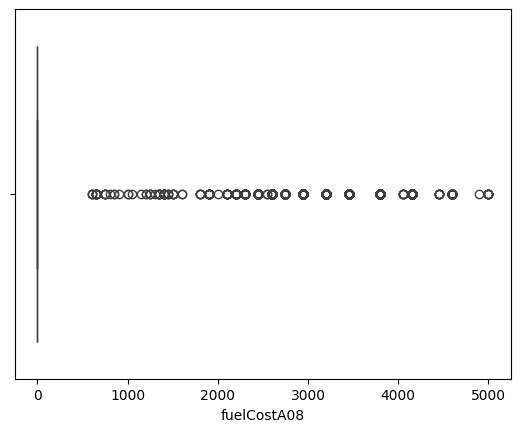

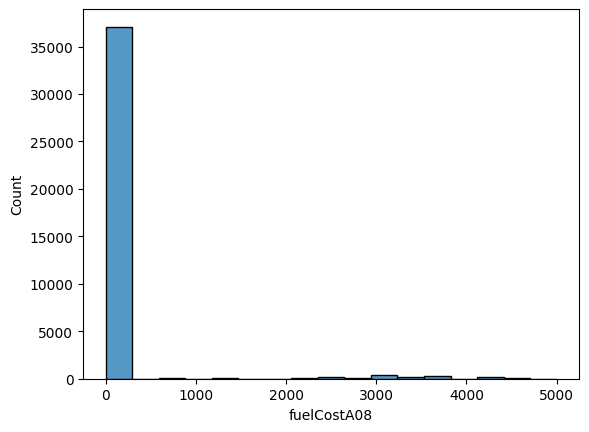

In [585]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Vehicle_fuel_economy_df['fuelCostA08'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Vehicle_fuel_economy_df, x='fuelCostA08')
plt.show()
#Se grafica un histograma
sns.histplot(data=Vehicle_fuel_economy_df, x='fuelCostA08')
plt.show()

La variable "fuelCostA08" presenta una distribución anormal con una asimetría positiva extrema, con la mayoría de los valores concentrados en 0 y una gran variabilidad en el resto. El promedio de 130.32 indica que la mayoría de los vehículos tienen valores cercanos a 0. Se recomienda transformar la variable, explorar su relación con otras variables y utilizar técnicas de visualización para comprender mejor su comportamiento.

count    38033.000000
mean         2.982200
std         28.042831
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        520.000000
Name: range, dtype: float64


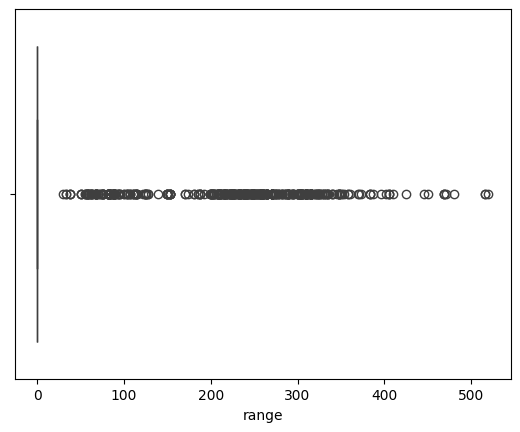

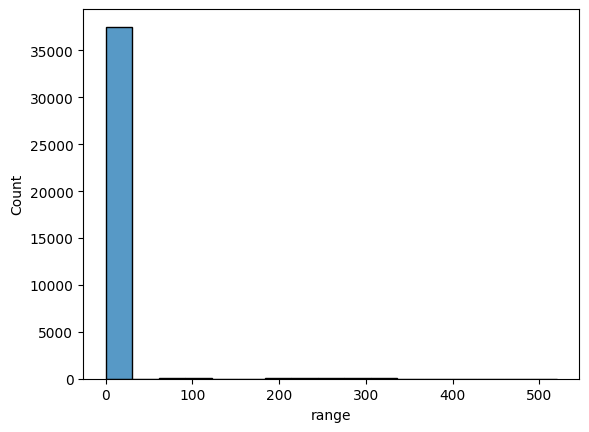

In [586]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Vehicle_fuel_economy_df['range'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Vehicle_fuel_economy_df, x='range')
plt.show()
#Se grafica un histograma
sns.histplot(data=Vehicle_fuel_economy_df, x='range')
plt.show()

La variable "fuelCostA08" presenta una distribución anormal con una asimetría positiva extrema, con la mayoría de los valores concentrados en 0 y una gran variabilidad en el resto. El promedio de 2.98 indica que la mayoría de los vehículos tienen valores cercanos a 0. Se recomienda transformar la variable, explorar su relación con otras variables y utilizar técnicas de visualización para comprender mejor su comportamiento.

count    38033.000000
mean         2.007309
std         23.254232
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        520.000000
Name: rangeCity, dtype: float64


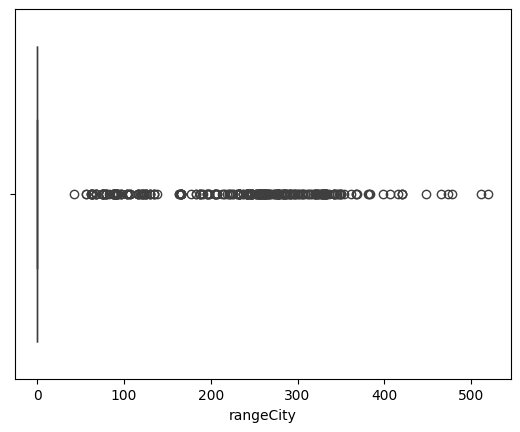

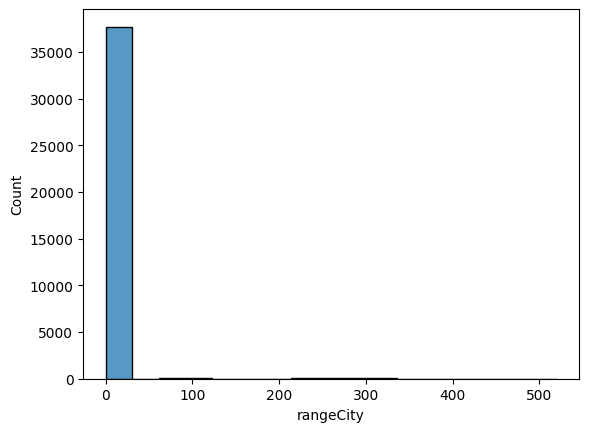

In [587]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Vehicle_fuel_economy_df['rangeCity'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Vehicle_fuel_economy_df, x='rangeCity')
plt.show()
#Se grafica un histograma
sns.histplot(data=Vehicle_fuel_economy_df, x='rangeCity')
plt.show()

La variable "rangeCity" presenta una distribución anormal con una asimetría positiva extrema, con la mayoría de los valores concentrados en 0 y una gran variabilidad en el resto. El promedio de 2.00 indica que la mayoría de los vehículos tienen valores cercanos a 0. Se recomienda transformar la variable, explorar su relación con otras variables y utilizar técnicas de visualización para comprender mejor su comportamiento.

count    38033.000000
mean         1.867010
std         21.868576
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        520.000000
Name: rangeHwy, dtype: float64


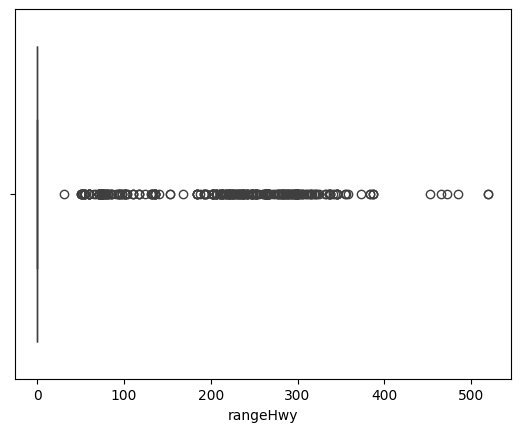

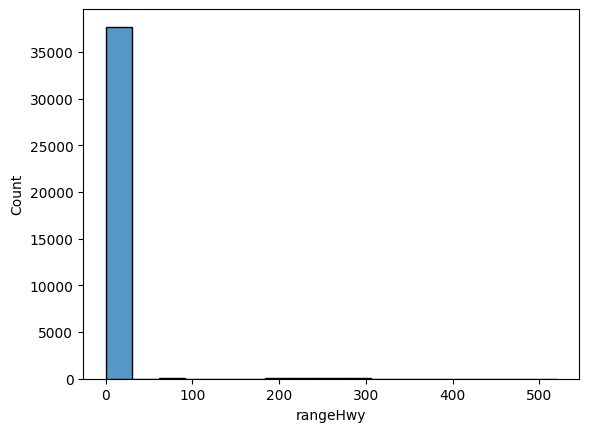

In [588]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Vehicle_fuel_economy_df['rangeHwy'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Vehicle_fuel_economy_df, x='rangeHwy')
plt.show()
#Se grafica un histograma
sns.histplot(data=Vehicle_fuel_economy_df, x='count    38033.000000
mean         1.867010
std         21.868576
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        520.000000
Name: rangeHwy, dtype: float64
')
plt.show()

La variable rangeCity muestra una distribución asimétrica de la población en las ciudades, con la mayoría de las ciudades teniendo una cantidad de habitantes relativamente baja y un pequeño grupo concentrando una gran cantidad de población. La mediana de 0 habitantes por ciudad indica que la mitad de las ciudades tienen menos de esa cantidad, mientras que la otra mitad tiene más. La alta desviación estándar y el rango confirman la variabilidad en la cantidad de habitantes. Esta información puede ser útil para analizar la distribución de la población, identificar ciudades con alta densidad de población y realizar estudios de mercado.

count    38033.000000
mean     -4946.290064
std       4327.399250
min     -37250.000000
25%      -7750.000000
50%      -4500.000000
75%      -2000.000000
max       7000.000000
Name: youSaveSpend, dtype: float64


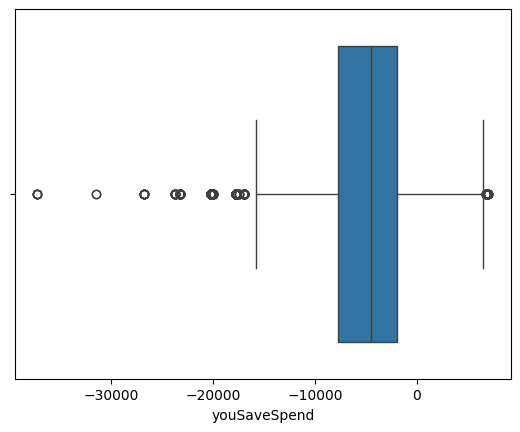

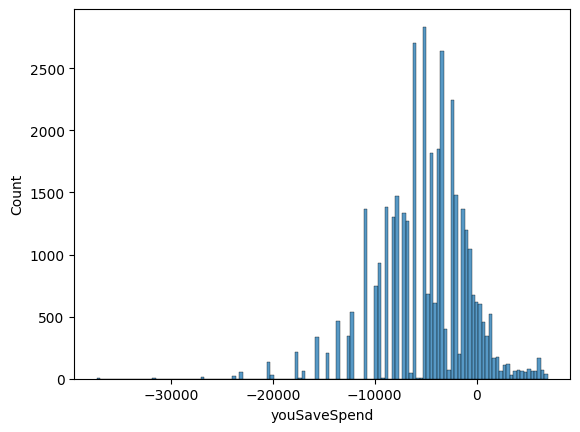

In [589]:

# Se utiliza describe para tener un resumen estadístico de los datos.
print(Vehicle_fuel_economy_df['youSaveSpend'].describe())
# Se hace un gráfico de cajas
sns.boxplot(data=Vehicle_fuel_economy_df, x='youSaveSpend')
plt.show()
#Se grafica un histograma
sns.histplot(data=Vehicle_fuel_economy_df, x='youSaveSpend')
plt.show()

La variable youSaveSpend muestra una distribución asimétrica hacia la izquierda de la cantidad de dinero que las personas ahorran o gastan, con la mayoría ahorrando o gastando una cantidad relativamente baja y un pequeño grupo ahorrando o gastando una gran cantidad. La mediana de -4500 dólares indica que la mitad de las personas ahorran o gastan menos de esa cantidad, mientras que la otra mitad ahorra o gasta más. La alta desviación estándar y el rango confirman la variabilidad en la cantidad de dinero. Esta información puede ser útil para analizar el comportamiento financiero de las personas, identificar a quienes ahorran o gastan mucho y realizar estudios de mercado.

Electric and Alternative fuel charging stations

Este dataset contiene información de estaciones de cargo y abastacimiento para autos con conbustibles alternativos distribuidos en Estados Unidos.

In [590]:
#Cargar datos
charging_stations_df=pd.read_csv('Datasets/Electric and Alternative Fuel Charging Stations.csv',sep=',')

In [591]:
#Se imprimen las primeras 5 filas del dataset
charging_stations_df.head(5)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False


In [642]:
#Se imprimen las columnas del dataset
charging_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 9 to 70215
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           381 non-null    object 
 1   Station Name             381 non-null    object 
 2   Street Address           381 non-null    object 
 3   Intersection Directions  34 non-null     object 
 4   City                     381 non-null    object 
 5   State                    381 non-null    object 
 6   Latitude                 381 non-null    float64
 7   Longitude                381 non-null    float64
dtypes: float64(2), object(6)
memory usage: 26.8+ KB


In [593]:
#Seleccionamos unicamente las columnas relevantes para nuestro analisis
charging_stations_df=charging_stations_df[['Fuel Type Code','Station Name','Street Address','Intersection Directions','City','State','Latitude','Longitude',]]

In [635]:
#Seleccionamos solamente las filas que contienen datos en Nueva York
charging_stations_df = charging_stations_df[charging_stations_df['City'] == 'New York']

In [636]:
#Revisar valores nulos
valores_faltantes = charging_stations_df.isna().sum()
print(valores_faltantes)

Fuel Type Code               0
Station Name                 0
Street Address               0
Intersection Directions    347
City                         0
State                        0
Latitude                     0
Longitude                    0
dtype: int64


Vemos que la columna Intersection Directions tiene un nivel alto de valores nulos. Es aconsejable eliminarla.

In [637]:
#Revision de valores duplicados
duplicados = charging_stations_df[charging_stations_df.duplicated(keep=False)]

#Se imprimen las filas duplicadas.
print(duplicados)

Empty DataFrame
Columns: [Fuel Type Code, Station Name, Street Address, Intersection Directions, City, State, Latitude, Longitude]
Index: []


Vemos que no hay valores duplicados

2
Fuel Type Code
ELEC    379
CNG       2
Name: count, dtype: int64


<Axes: xlabel='Fuel Type Code', ylabel='count'>

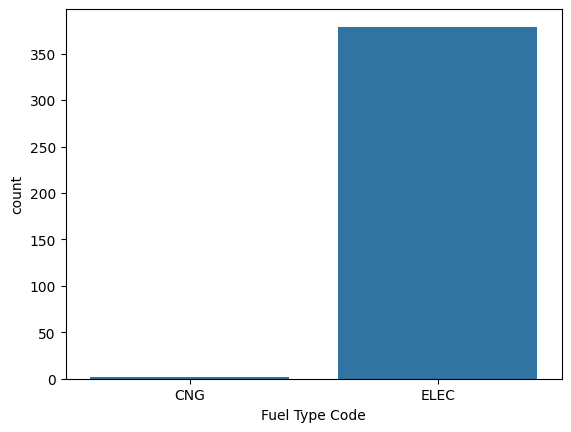

In [638]:
#Variables categoricas
print(len(charging_stations_df['Fuel Type Code'].unique()))
print(charging_stations_df['Fuel Type Code'].value_counts())
sns.countplot(data=charging_stations_df,x='Fuel Type Code')

La variable Fuel Type Code muestra que ELEC es el tipo de combustible más utilizado por los vehículos, con una frecuencia absoluta de 379 registros y un porcentaje del 99.71%. CNG, por otro lado, tiene una frecuencia absoluta de 2 registros y un porcentaje del 0.29%. Esta información puede ser útil para analizar tendencias en el consumo de energía, desarrollar políticas públicas y realizar estudios de mercado.

354
Street Address
11 E Loop Rd         8
10 Riverside Blvd    7
10 Central Rd        3
225 W 49th St        3
59 Allen Street      2
                    ..
311 W Broadway       1
310 Park Ave         1
310  E 11th St       1
308 Greenwich St     1
107 Essx St          1
Name: count, Length: 354, dtype: int64


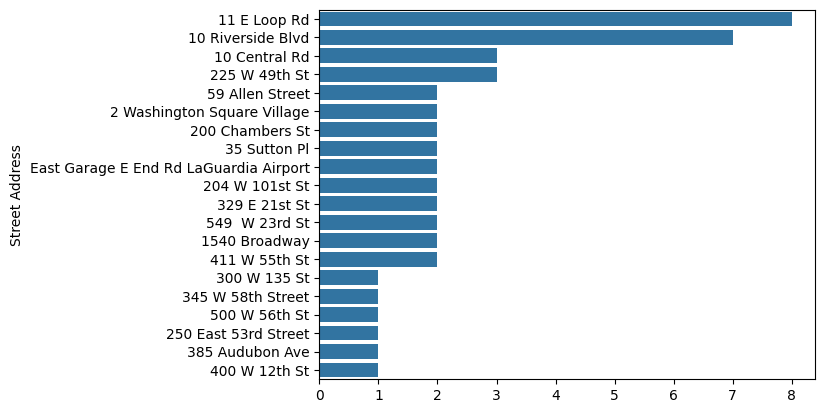

In [639]:


print(len(charging_stations_df['Street Address'].unique()))
print(charging_stations_df['Street Address'].value_counts())
top_5 = charging_stations_df['Street Address'].value_counts().head(20)
# Se crea un gráfico de barras
ax = sns.barplot(x=top_5.values, y=top_5.index, orient='y')

# Se imprime la gráfica
plt.show()

Contaminación sonora

In [600]:
#Se importa el dataset
annotations=pd.read_csv('annotations.csv',sep=',')

In [601]:
annotations.head(5)

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2,test,0,00_026884.wav,-3,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,test,0,00_026884.wav,-1,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,test,0,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,0,1,0,0,0,0,0


In [602]:
annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 78 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   split                                         62022 non-null  object 
 1   sensor_id                                     62022 non-null  int64  
 2   audio_filename                                62022 non-null  object 
 3   annotator_id                                  62022 non-null  int64  
 4   borough                                       62022 non-null  int64  
 5   block                                         62022 non-null  int64  
 6   latitude                                      62022 non-null  float64
 7   longitude                                     62022 non-null  float64
 8   year                                          62022 non-null  int64  
 9   week                                          62022 non-null 

In [603]:
#Seleccionamos solo las columnas que son relevantes
contaminacion_sonora_df=annotations[['audio_filename','sensor_id','borough','block','latitude','longitude','year','week','day','hour','1-1_small-sounding-engine_presence','1-2_medium-sounding-engine_presence','1-3_large-sounding-engine_presence','1-X_engine-of-uncertain-size_presence','1-1_small-sounding-engine_proximity','1-2_medium-sounding-engine_proximity','1-3_large-sounding-engine_proximity','1-X_engine-of-uncertain-size_proximity','1_engine_presence']]

In [604]:
contaminacion_sonora_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   audio_filename                          62022 non-null  object 
 1   sensor_id                               62022 non-null  int64  
 2   borough                                 62022 non-null  int64  
 3   block                                   62022 non-null  int64  
 4   latitude                                62022 non-null  float64
 5   longitude                               62022 non-null  float64
 6   year                                    62022 non-null  int64  
 7   week                                    62022 non-null  int64  
 8   day                                     62022 non-null  int64  
 9   hour                                    62022 non-null  int64  
 10  1-1_small-sounding-engine_presence      62022 non-null  in

In [605]:
#Revisión de nulos
valores_faltantes = contaminacion_sonora_df.isna().sum()
print(valores_faltantes)

audio_filename                            0
sensor_id                                 0
borough                                   0
block                                     0
latitude                                  0
longitude                                 0
year                                      0
week                                      0
day                                       0
hour                                      0
1-1_small-sounding-engine_presence        0
1-2_medium-sounding-engine_presence       0
1-3_large-sounding-engine_presence        0
1-X_engine-of-uncertain-size_presence     0
1-1_small-sounding-engine_proximity       0
1-2_medium-sounding-engine_proximity      0
1-3_large-sounding-engine_proximity       0
1-X_engine-of-uncertain-size_proximity    0
1_engine_presence                         0
dtype: int64


Vemos que no hay valores faltantes

In [606]:
#Revision de valores duplicados
duplicados = contaminacion_sonora_df[contaminacion_sonora_df.duplicated(keep=False)]

#Se imprimen las filas duplicadas.
print(duplicados)

      audio_filename  sensor_id  borough  block  latitude  longitude  year  \
0      00_026884.wav          0        1    547  40.72951  -73.99388  2019   
3      00_026884.wav          0        1    547  40.72951  -73.99388  2019   
8      00_026919.wav          0        1    547  40.72951  -73.99388  2019   
11     00_026919.wav          0        1    547  40.72951  -73.99388  2019   
13     00_026919.wav          0        1    547  40.72951  -73.99388  2019   
...              ...        ...      ...    ...       ...        ...   ...   
62016  46_020807.wav         46        1    559  40.73365  -73.98879  2018   
62017  46_020807.wav         46        1    559  40.73365  -73.98879  2018   
62018  46_020807.wav         46        1    559  40.73365  -73.98879  2018   
62019  46_020853.wav         46        1    559  40.73365  -73.98879  2018   
62020  46_020853.wav         46        1    559  40.73365  -73.98879  2018   

       week  day  hour  1-1_small-sounding-engine_presence  \
0

Vemos que hay una cantidad alta de valores duplicados. Esto se puede ver a multiples indentificaciones de un mismo dato

In [607]:
#Se elimina los valores duplicados para el analisis
contaminacion_sonora_df.drop_duplicates(inplace=True)
contaminacion_sonora_df.reset_index()

,index,audio_filename,sensor_id,borough,block,latitude,longitude,year,week,day,hour,1-1_small-sounding-engine_presence,1-2_medium-sounding-engine_presence,1-3_large-sounding-engine_presence,1-X_engine-of-uncertain-size_presence,1-1_small-sounding-engine_proximity,1-2_medium-sounding-engine_proximity,1-3_large-sounding-engine_proximity,1-X_engine-of-uncertain-size_proximity,1_engine_presence
0,0,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,4,8,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,4,8,0,0,1,0,-1,-1,-1,-1,1
2,2,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,4,8,0,1,0,0,-1,-1,-1,-1,1
3,4,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,4,8,0,1,1,0,-1,-1,-1,-1,1
4,5,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,4,8,0,1,1,0,-1,near,near,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33397,62013,46_020723.wav,46,1,559,40.73365,-73.98879,2018,41,0,10,0,0,1,0,-1,-1,near,-1,1
33398,62014,46_020723.wav,46,1,559,40.73365,-73.98879,2018,41,0,10,0,0,1,0,-1,-1,far,-1,1
33399,62016,46_020807.wav,46,1,559,40.73365,-73.98879,2018,42,5,19,0,0,0,0,-1,-1,-1,-1,0
33400,62019,46_020853.wav,46,1,559,40.73365,-73.98879,2018,34,2,9,0,0,0,0,-1,-1,-1,-1,0


In [608]:
#Revision del tipo de dato
print(contaminacion_sonora_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33402 entries, 0 to 62021
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   audio_filename                          33402 non-null  object 
 1   sensor_id                               33402 non-null  int64  
 2   borough                                 33402 non-null  int64  
 3   block                                   33402 non-null  int64  
 4   latitude                                33402 non-null  float64
 5   longitude                               33402 non-null  float64
 6   year                                    33402 non-null  int64  
 7   week                                    33402 non-null  int64  
 8   day                                     33402 non-null  int64  
 9   hour                                    33402 non-null  int64  
 10  1-1_small-sounding-engine_presence      33402 non-null  int64  

Obervamos que las columnas corresponden al tipo de dato esperado

3
borough
1    31732
3     1580
4       90
Name: count, dtype: int64


<Axes: xlabel='borough', ylabel='count'>

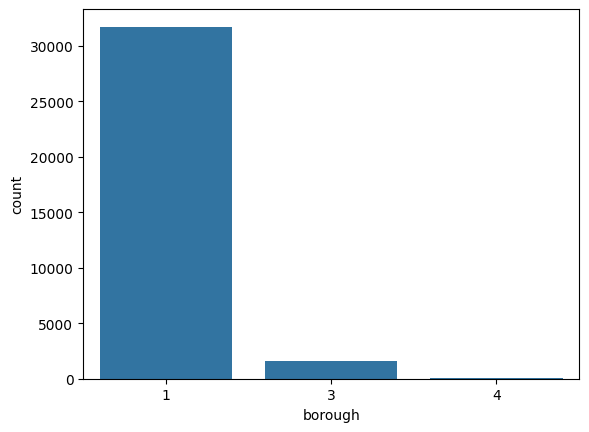

In [609]:
#Variables categoricas
print(len(contaminacion_sonora_df['borough'].unique()))
print(contaminacion_sonora_df['borough'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='borough')

El análisis de la variable borough indica que la mayoría de los sensores se encuentran en Manhattan (98.23%), mientras que Brooklyn y Queens tienen porcentajes muy bajos (4.91% y 0.28%, respectivamente). Esto refleja una distribución espacial asimétrica, con una alta concentración de sensores en Manhattan. La información sobre la distribución de los sensores por distrito puede ser útil para analizar su distribución espacial, identificar áreas con alta densidad de sensores y realizar estudios de calidad del aire.

4
year
2017    15945
2018    11925
2019     4196
2016     1336
Name: count, dtype: int64


<Axes: xlabel='year', ylabel='count'>

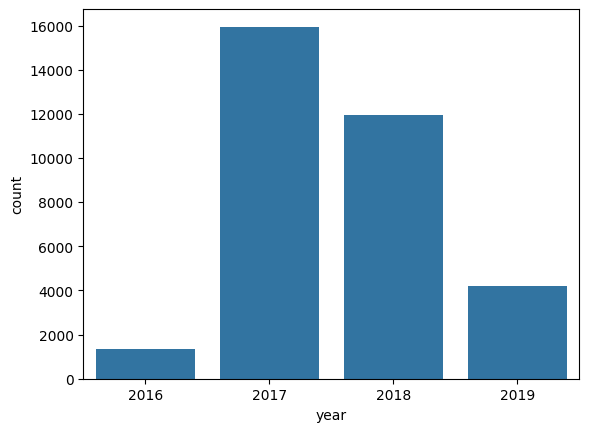

In [610]:

print(len(contaminacion_sonora_df['year'].unique()))
print(contaminacion_sonora_df['year'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='year')

El análisis de la variable año revela que la mayoría de los datos se concentran en 2017 y 2018, con una tendencia decreciente en el número de registros a lo largo del tiempo. Esto sugiere que el esfuerzo de recogida de datos puede haber estado más centrado durante estos primeros años. La información proporcionada por la variable año puede ser útil para analizar tendencias en la calidad del aire, identificar patrones estacionales y evaluar el impacto de las políticas medioambientales. Sin embargo, es fundamental tener en cuenta otras variables como la estación, el tipo de contaminante, la ubicación del sensor y las condiciones meteorológicas para comprender mejor las tendencias de la calidad del aire.

52
week
3     1171
2     1159
4     1051
6     1034
5     1026
51     865
46     834
49     831
1      817
45     813
43     763
44     753
42     728
47     721
50     711
48     694
52     647
28     637
40     625
18     622
34     620
13     619
37     605
7      600
19     591
24     588
41     575
32     568
15     563
38     556
35     556
30     553
29     549
33     544
39     542
21     541
17     539
22     524
12     512
26     503
31     500
8      500
20     499
36     490
25     488
27     480
16     478
23     475
14     473
11     455
10     420
9      394
Name: count, dtype: int64


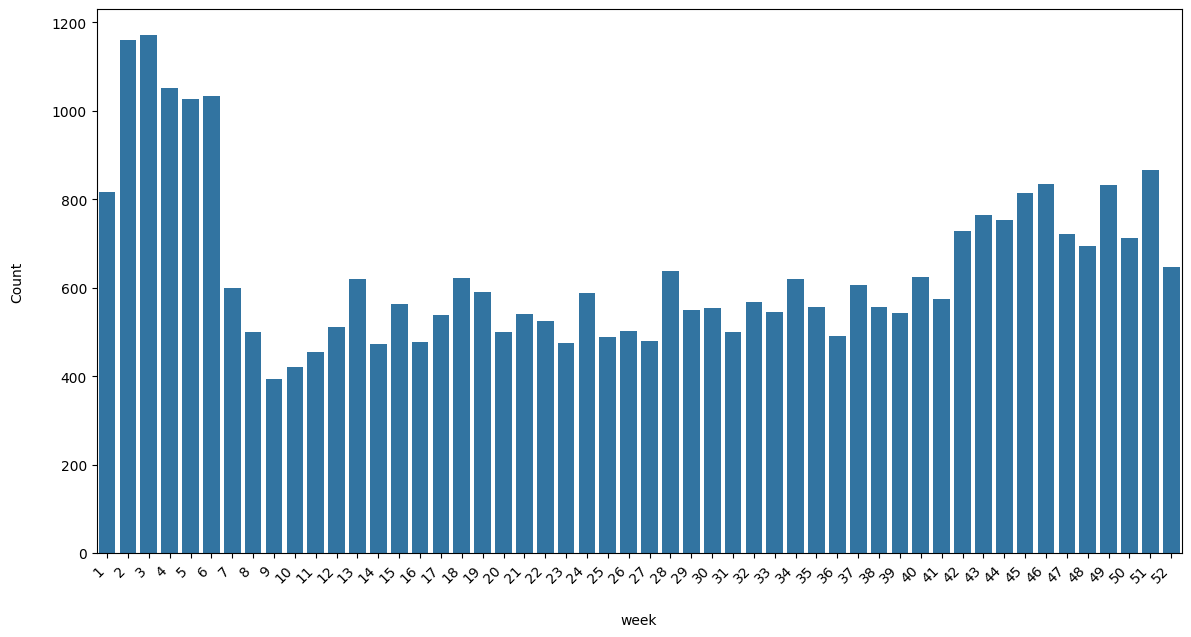

In [611]:

print(len(contaminacion_sonora_df['week'].unique()))
print(contaminacion_sonora_df['week'].value_counts())
# Get the sorted counts of manufacturers

# Create a larger figure
plt.figure(figsize=(14, 8))

# Plot the count plot
ax = sns.countplot(x="week", data=contaminacion_sonora_df)

# Rotate the x-axis labels and set alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Set more spacing for the x-axis labels
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('week', labelpad=20)  # Adjust the labelpad to increase spacing
ax.set_ylabel('Count', labelpad=20)  # Optionally adjust the y-axis label padding

# Adjust subplot parameters to give more room for the labels
plt.subplots_adjust(bottom=0.2)

# Display the plot
plt.show()

7
day
4    5255
3    5198
1    5070
2    4990
0    4738
5    4384
6    3767
Name: count, dtype: int64


<Axes: xlabel='day', ylabel='count'>

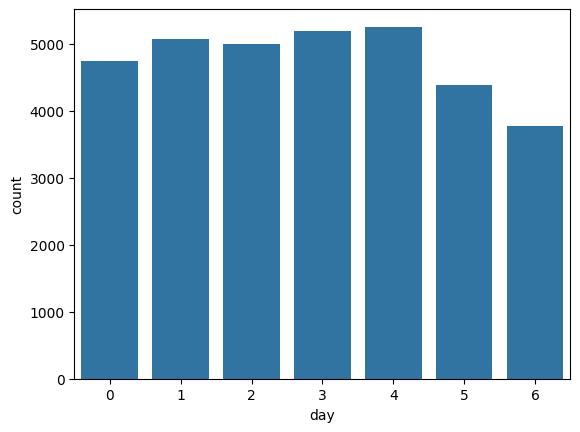

In [612]:

print(len(contaminacion_sonora_df['day'].unique()))
print(contaminacion_sonora_df['day'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='day')

El análisis de la variable día revela que la mayoría de los datos se concentran en los días 4, 3 y 1, mientras que un grupo más reducido de datos se encuentra en los días 2, 0, 5 y 6. No hay una tendencia clara en el número de registros entre los días de la semana. Esto sugiere que la recogida de datos puede haberse centrado más en días concretos de la semana. La información proporcionada por la variable día puede ser útil para analizar patrones de actividad, identificar picos de contaminación y evaluar la eficacia de las medidas de control de la contaminación. Sin embargo, es fundamental tener en cuenta otras variables como la hora del día, el tipo de contaminante, la ubicación del sensor y las condiciones meteorológicas para comprender mejor los patrones de calidad del aire.

24
hour
9     2222
13    2113
8     2112
11    2110
10    2041
14    1974
12    1960
15    1681
7     1598
16    1547
18    1452
17    1443
20    1427
19    1343
21    1049
22     970
23     913
0      843
6      807
5      786
1      767
4      756
3      748
2      740
Name: count, dtype: int64


<Axes: xlabel='hour', ylabel='count'>

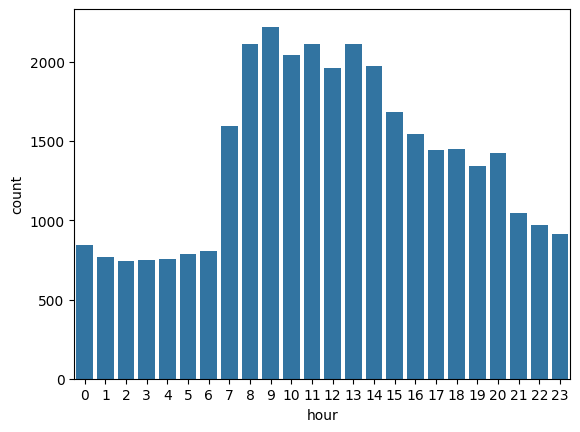

In [613]:

print(len(contaminacion_sonora_df['hour'].unique()))
print(contaminacion_sonora_df['hour'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='hour')

El análisis de la variable hora revela que la mayoría de los datos se concentran en las horas 13, 8, 11, 10 y 14, con una tendencia decreciente en el número de registros a lo largo del día. Hay un pico de actividad durante la mañana y las primeras horas de la tarde, seguido de un descenso por la noche y durante la noche. Esto sugiere que la recogida de datos puede haberse centrado más en momentos concretos del día. La información proporcionada por la variable hora puede ser útil para analizar los patrones de actividad, identificar los picos de contaminación y evaluar la eficacia de las medidas de control de la contaminación. Sin embargo, es fundamental tener en cuenta otras variables como el día de la semana, el tipo de contaminante, la ubicación del sensor y las condiciones meteorológicas para comprender mejor los patrones de calidad del aire.

3
1-1_small-sounding-engine_presence
 0    30282
 1     1954
-1     1166
Name: count, dtype: int64


<Axes: xlabel='1-1_small-sounding-engine_presence', ylabel='count'>

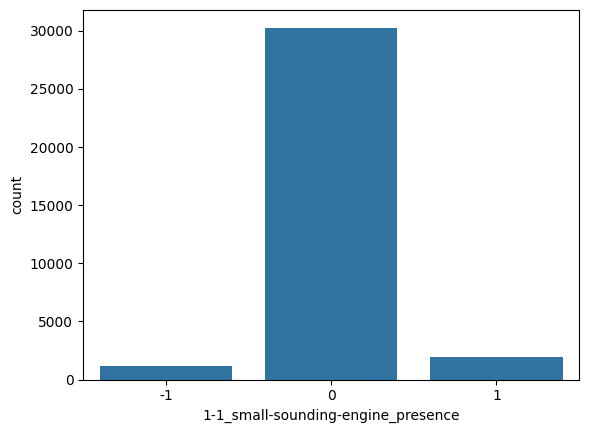

In [614]:
print(len(contaminacion_sonora_df['1-1_small-sounding-engine_presence'].unique()))
print(contaminacion_sonora_df['1-1_small-sounding-engine_presence'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='1-1_small-sounding-engine_presence')


3
1-2_medium-sounding-engine_presence
 0    26423
 1     5813
-1     1166
Name: count, dtype: int64


<Axes: xlabel='1-2_medium-sounding-engine_presence', ylabel='count'>

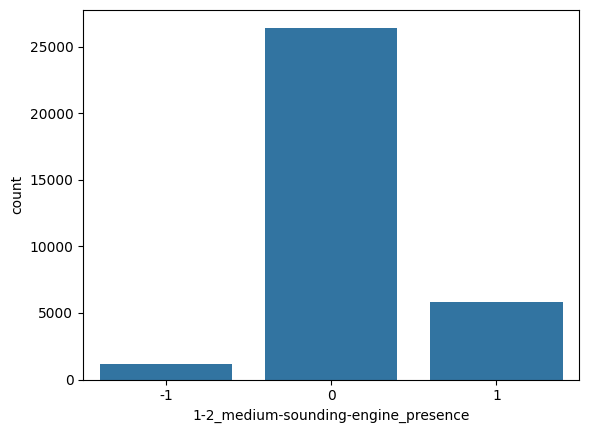

In [615]:

print(len(contaminacion_sonora_df['1-2_medium-sounding-engine_presence'].unique()))
print(contaminacion_sonora_df['1-2_medium-sounding-engine_presence'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='1-2_medium-sounding-engine_presence')

El análisis de la variable hora revela que la mayoría de los datos (90,66%) se registraron en la hora 0. Esto sugiere que la recogida de datos puede haberse centrado en un momento concreto del día o que los sensores sólo estaban activos a esa hora. La información proporcionada por la variable hora puede ser útil para analizar los patrones de actividad y las tendencias de contaminación, pero es crucial tener en cuenta las posibles limitaciones de los datos y otros factores como el día de la semana, el tipo de contaminante, la ubicación del sensor y las condiciones meteorológicas para una comprensión más completa.

3
1-3_large-sounding-engine_presence
 0    26314
 1     5922
-1     1166
Name: count, dtype: int64


<Axes: xlabel='1-3_large-sounding-engine_presence', ylabel='count'>

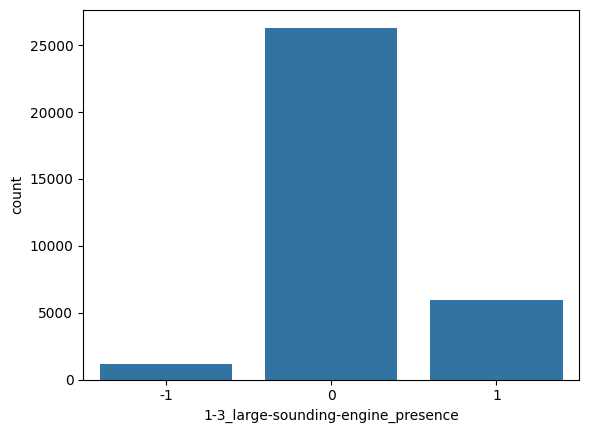

In [616]:

print(len(contaminacion_sonora_df['1-3_large-sounding-engine_presence'].unique()))
print(contaminacion_sonora_df['1-3_large-sounding-engine_presence'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='1-3_large-sounding-engine_presence')

El análisis de la variable 1-3_large-sounding-engine_presence revela que los motores de gran cilindrada de 1 a 3 cilindros no estaban presentes en la mayoría de los casos (98,62%). Sin embargo, hubo un pequeño número de casos (1,38%) en los que se detectó este tipo de motores. La información proporcionada por esta variable podría ser útil para analizar los patrones de contaminación acústica o identificar las zonas en las que estos motores son más frecuentes. Es importante tener en cuenta lo limitado de la muestra de datos y el contexto de los mismos a la hora de interpretar los resultados.

3
1-X_engine-of-uncertain-size_presence
 0    29779
 1     2457
-1     1166
Name: count, dtype: int64


<Axes: xlabel='1-X_engine-of-uncertain-size_presence', ylabel='count'>

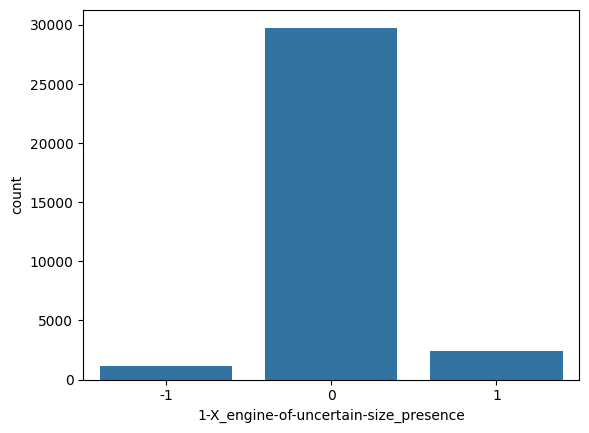

In [617]:

print(len(contaminacion_sonora_df['1-X_engine-of-uncertain-size_presence'].unique()))
print(contaminacion_sonora_df['1-X_engine-of-uncertain-size_presence'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='1-X_engine-of-uncertain-size_presence')

La variable 1-X_engine-of-uncertain-size_presence indica la presencia de motores de tamaño incierto. Los datos muestran que la mayoría de los registros (97.58%) tienen un valor de 0, lo que indica que los motores de tamaño incierto no estuvieron presentes en la mayoría de los casos. Sin embargo, un pequeño porcentaje de registros (8.03%) tienen un valor de 1, lo que significa que se detectaron motores de tamaño incierto en esos casos. Un pequeño número de registros (3.81%) tiene un valor de -1, lo que podría representar errores o datos faltantes.

4
1-1_small-sounding-engine_proximity
-1         31524
near         854
far          762
notsure      262
Name: count, dtype: int64


<Axes: xlabel='1-1_small-sounding-engine_proximity', ylabel='count'>

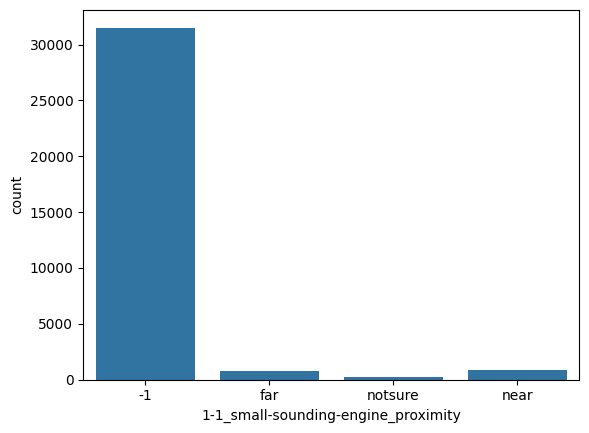

In [618]:

print(len(contaminacion_sonora_df['1-1_small-sounding-engine_proximity'].unique()))
print(contaminacion_sonora_df['1-1_small-sounding-engine_proximity'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='1-1_small-sounding-engine_proximity')

La variable 1-1_small-sounding-engine_proximity indica la proximidad de motores de pequeño sonido. La mayoría de los registros (31.524) tienen un valor de "-1", lo que indica que los motores de pequeño sonido no se detectaron en su proximidad en la mayoría de los casos. Un pequeño número de registros (854) tienen el valor "cerca", lo que significa que los motores de pequeño sonido estaban cerca en esos casos. Otro pequeño número de registros (762) tienen el valor "lejos", lo que sugiere que se detectaron motores de pequeño sonido a una distancia. El número más pequeño de registros (262) tiene el valor "notsure", lo que significa que los datos no pudieron determinar la proximidad de los motores de pequeño sonido en esos casos.

4
1-2_medium-sounding-engine_proximity
-1         28073
near        2540
far         2199
notsure      590
Name: count, dtype: int64


<Axes: xlabel='1-2_medium-sounding-engine_proximity', ylabel='count'>

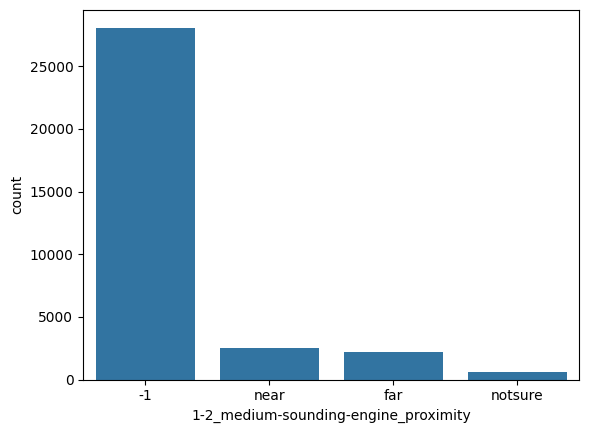

In [619]:

print(len(contaminacion_sonora_df['1-2_medium-sounding-engine_proximity'].unique()))
print(contaminacion_sonora_df['1-2_medium-sounding-engine_proximity'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='1-2_medium-sounding-engine_proximity')

La variable 1-2_medium-sounding-engine_proximity indica la proximidad de motores de sonido medio. La mayor parte de los datos (28.073) tiene un valor de "-1", lo que indica que los motores de sonido medio no se detectaron en las proximidades en la mayoría de los casos. Un número moderado de registros (2.540) tiene el valor "cerca", lo que significa que los motores de sonido medio estaban cerca en esos casos. Otro número moderado de registros (2.199) tiene el valor "lejos", lo que sugiere que se detectaron motores de sonido medio a una distancia. El número más pequeño de registros (590) tiene el valor "notsure", lo que significa que los datos no pudieron determinar la proximidad de los motores de sonido medio en esos casos.

4
1-3_large-sounding-engine_proximity
-1         28043
near        3453
far         1481
notsure      425
Name: count, dtype: int64


<Axes: xlabel='1-3_large-sounding-engine_proximity', ylabel='count'>

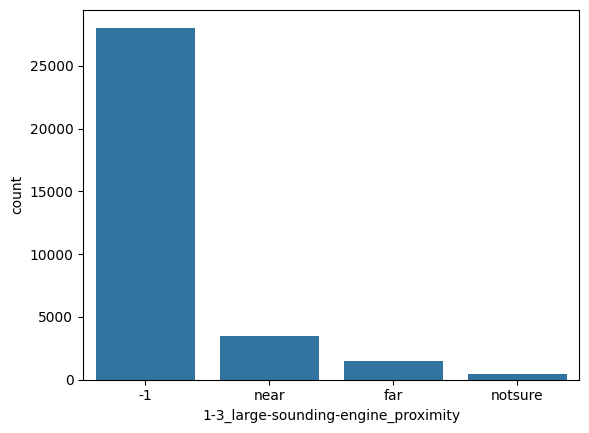

In [620]:

print(len(contaminacion_sonora_df['1-3_large-sounding-engine_proximity'].unique()))
print(contaminacion_sonora_df['1-3_large-sounding-engine_proximity'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='1-3_large-sounding-engine_proximity')

La variable 1-3_large-sounding-engine_proximity indica la proximidad de motores de gran sonido. La mayoría de los registros (79%) muestran que los motores de gran sonido no se detectaron cerca o se detectaron a distancia. Un pequeño porcentaje (12%) indica la presencia de estos motores cerca. Es importante considerar que el análisis se basa en una muestra de datos limitada y el contexto de la recolección de datos podría influir en los resultados.

4
1-X_engine-of-uncertain-size_proximity
-1         31177
near        1013
far          821
notsure      391
Name: count, dtype: int64


<Axes: xlabel='1-X_engine-of-uncertain-size_proximity', ylabel='count'>

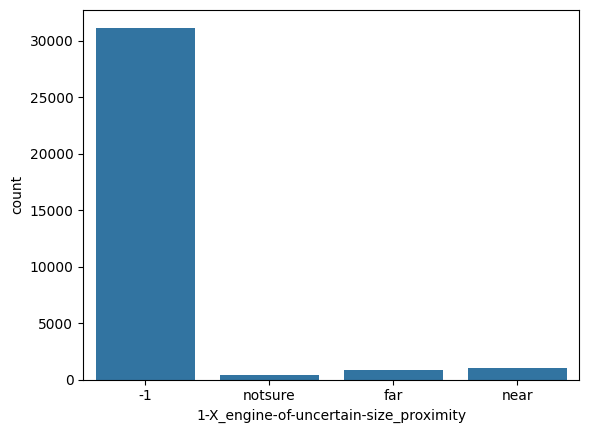

In [621]:

print(len(contaminacion_sonora_df['1-X_engine-of-uncertain-size_proximity'].unique()))
print(contaminacion_sonora_df['1-X_engine-of-uncertain-size_proximity'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='1-X_engine-of-uncertain-size_proximity')

La variable 1-X_engine-of-uncertain-size_proximity indica la proximidad de motores de tamaño incierto. La mayoría de los registros (92%) muestran que los motores de tamaño incierto no se detectaron cerca o se detectaron a distancia. Un pequeño porcentaje (menos del 3%) indica la presencia de estos motores cerca. Es importante considerar que el análisis se basa en una muestra de datos limitada y el contexto de la recolección de datos podría influir en los resultados.

3
1_engine_presence
 0    16907
 1    15329
-1     1166
Name: count, dtype: int64


<Axes: xlabel='1_engine_presence', ylabel='count'>

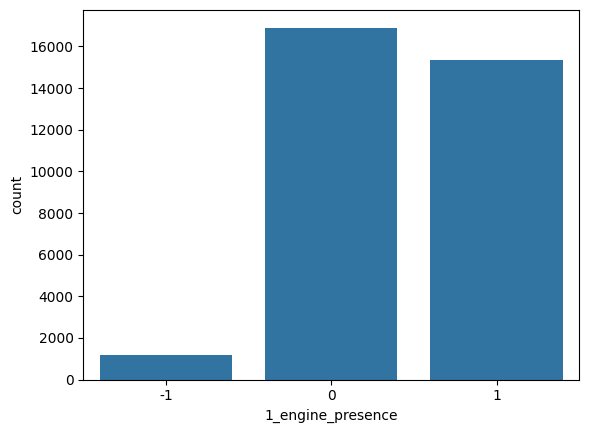

In [622]:

print(len(contaminacion_sonora_df['1_engine_presence'].unique()))
print(contaminacion_sonora_df['1_engine_presence'].value_counts())
sns.countplot(data=contaminacion_sonora_df,x='1_engine_presence')

La variable 1_engine_presence indica que los motores estuvieron presentes en el área más frecuentemente que ausentes (52% vs 47%). Un pequeño porcentaje de datos no pudo determinar la presencia de motores (1%). Es importante considerar que el análisis se basa en una muestra de datos limitada y el contexto de la recolección de datos podría influir en los resultados.

Calidad del aire

In [623]:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 20000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("c3uy-2p5r",limit=20000)

# Convert to pandas DataFrame
calidad_aire_df = pd.DataFrame.from_records(results)

In [624]:
calidad_aire_df.head()

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,827080,386,Ozone (O3),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Summer 2022,2022-06-01T00:00:00.000,33.3
1,827061,386,Ozone (O3),Mean,ppb,UHF34,405,Ridgewood - Forest Hills,Summer 2022,2022-06-01T00:00:00.000,34.2
2,827067,386,Ozone (O3),Mean,ppb,UHF34,302,Central Harlem - Morningside Heights,Summer 2022,2022-06-01T00:00:00.000,30.9
3,827081,386,Ozone (O3),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Summer 2022,2022-06-01T00:00:00.000,31.7
4,825967,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Summer 2022,2022-06-01T00:00:00.000,12.0


In [625]:
calidad_aire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   unique_id       18025 non-null  object
 1   indicator_id    18025 non-null  object
 2   name            18025 non-null  object
 3   measure         18025 non-null  object
 4   measure_info    18025 non-null  object
 5   geo_type_name   18025 non-null  object
 6   geo_join_id     18016 non-null  object
 7   geo_place_name  18016 non-null  object
 8   time_period     18025 non-null  object
 9   start_date      18025 non-null  object
 10  data_value      18025 non-null  object
dtypes: object(11)
memory usage: 1.5+ MB


In [626]:
#Revisar valores nulos
#Revisión de nulos
valores_faltantes = calidad_aire_df.isna().sum()
print(valores_faltantes)

unique_id         0
indicator_id      0
name              0
measure           0
measure_info      0
geo_type_name     0
geo_join_id       9
geo_place_name    9
time_period       0
start_date        0
data_value        0
dtype: int64


Vemos que son muy pocos los valores nulos en las columnas geo_join_id y geo_place_name. En esos casos se recomienda eliminar la fila.

In [627]:
#Revosar valores duplicados
#Revision de valores duplicados
duplicados = calidad_aire_df[calidad_aire_df.duplicated(keep=False)]

#Se imprimen las filas duplicadas.
print(duplicados)

Empty DataFrame
Columns: [unique_id, indicator_id, name, measure, measure_info, geo_type_name, geo_join_id, geo_place_name, time_period, start_date, data_value]
Index: []


Vemos que no hay valores duplicados

In [628]:
#Revisar el tipo de dato
#Revision del tipo de dato
print(calidad_aire_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   unique_id       18025 non-null  object
 1   indicator_id    18025 non-null  object
 2   name            18025 non-null  object
 3   measure         18025 non-null  object
 4   measure_info    18025 non-null  object
 5   geo_type_name   18025 non-null  object
 6   geo_join_id     18016 non-null  object
 7   geo_place_name  18016 non-null  object
 8   time_period     18025 non-null  object
 9   start_date      18025 non-null  object
 10  data_value      18025 non-null  object
dtypes: object(11)
memory usage: 1.5+ MB
None


Vemos que las columnas no corresponden con el tipo de dato esperado.

18
name
Fine particles (PM 2.5)                                   5922
Nitrogen dioxide (NO2)                                    5922
Ozone (O3)                                                2115
Asthma emergency departments visits due to Ozone           485
Asthma hospitalizations due to Ozone                       484
Asthma emergency department visits due to PM2.5            480
Annual vehicle miles traveled (cars)                       321
Annual vehicle miles traveled (trucks)                     321
Annual vehicle miles traveled                              321
Deaths due to PM2.5                                        240
Cardiovascular hospitalizations due to PM2.5 (age 40+)     240
Cardiac and respiratory deaths due to Ozone                240
Respiratory hospitalizations due to PM2.5 (age 20+)        240
Outdoor Air Toxics - Formaldehyde                          203
Outdoor Air Toxics - Benzene                               203
Boiler Emissions- Total PM2.5 Emissions        

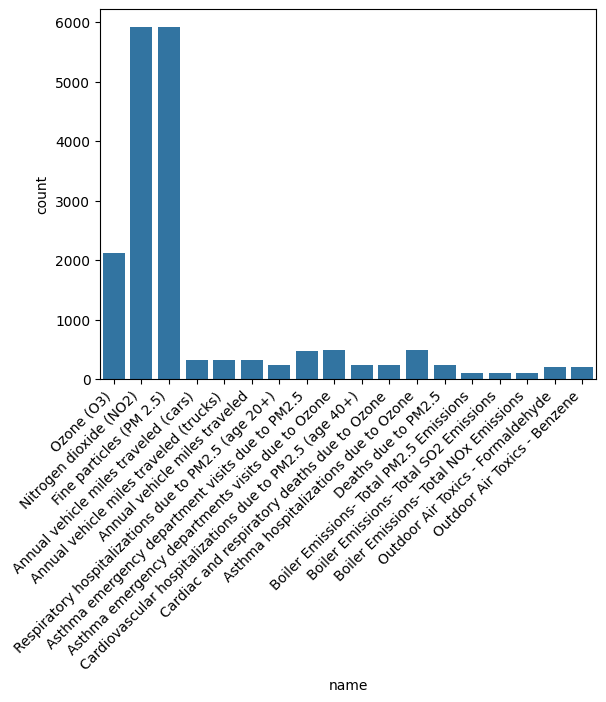

In [629]:
#Variables categoricas
#Variables categoricas


print(len(calidad_aire_df['name'].unique()))
print(calidad_aire_df['name'].value_counts())
ax = sns.countplot(x="name", data=calidad_aire_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

Vemos que hay distintos tipos de datos todos empaquetados en una misma tabla y distinguidos a través de la columna name 

8
measure_info
ppb                     8037
mcg/m3                  5922
per 100,000 adults      1440
per square mile          963
per 100,000 children     729
Âµg/m3                   406
number                   288
per 100,000              240
Name: count, dtype: int64


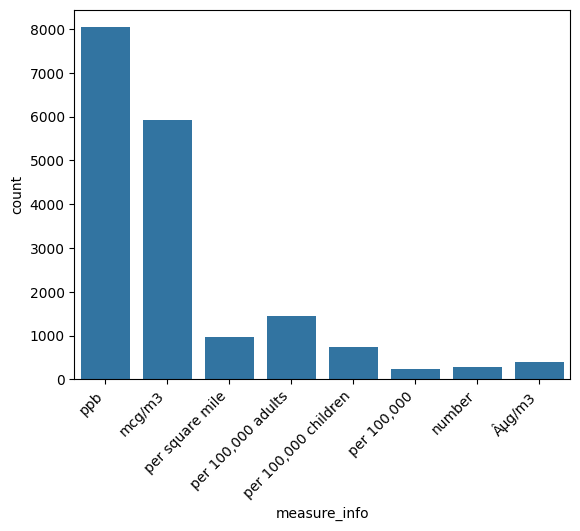

In [631]:

print(len(calidad_aire_df['measure_info'].unique()))
print(calidad_aire_df['measure_info'].value_counts())
ax = sns.countplot(x="measure_info", data=calidad_aire_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

Vemos que en estos datos, la medición con mayor prevalencia es ppb, seguido de mcg/m3.

5
geo_type_name
UHF42       7140
CD          6490
UHF34       3366
Borough      859
Citywide     170
Name: count, dtype: int64


<Axes: xlabel='geo_type_name', ylabel='count'>

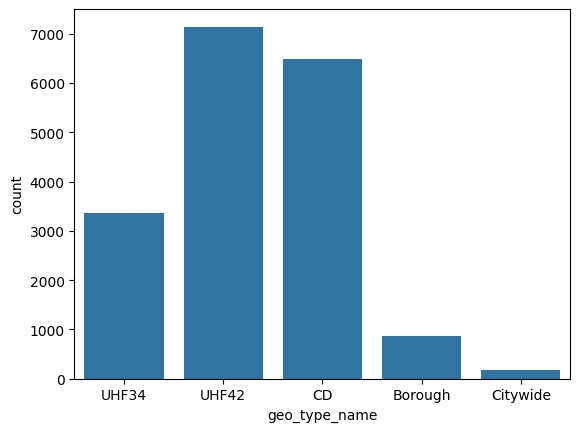

In [632]:

print(len(calidad_aire_df['geo_type_name'].unique()))
print(calidad_aire_df['geo_type_name'].value_counts())
sns.countplot(data=calidad_aire_df,x='geo_type_name')

La información se recopiló principalmente en áreas designadas como "UHF42", "CD" y "UHF34" (85% en total), con una menor presencia de datos de áreas "Borough" y "Citywide" (5% y 1% respectivamente). Es importante considerar que el análisis se basa en una muestra de datos limitada y el contexto de la recolección de datos podría influir en los resultados.

115
geo_place_name
Pelham - Throgs Neck                 269
Ridgewood - Forest Hills             269
Northeast Bronx                      269
East Flatbush - Flatbush             269
Downtown - Heights - Slope           269
                                    ... 
Northern SI                           99
Chelsea-Village                       99
Upper East Side-Gramercy              99
Bayside Little Neck-Fresh Meadows     99
Southern SI                           99
Name: count, Length: 114, dtype: int64


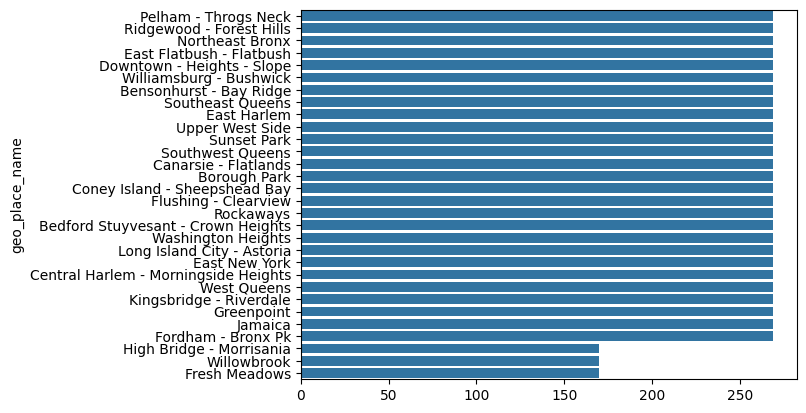

In [633]:

print(len(calidad_aire_df['geo_place_name'].unique()))
print(calidad_aire_df['geo_place_name'].value_counts())

top_5 = calidad_aire_df['geo_place_name'].value_counts().head(30)
# Se crea un gráfico de barras
ax = sns.barplot(x=top_5.values, y=top_5.index, orient='y')

# Se imprime la gráfica
plt.show()

La información se recopiló en una variedad de ubicaciones (114 lugares únicos). Los lugares con más registros, según el recuento de mediciones, incluyen Pelham - Throgs Neck, Ridgewood - Forest Hills, Northeast Bronx, East Flatbush - Flatbush y Downtown - Heights - Slope (todos con 269 personas).